# Data Science Assignment 


Student Name (RDS2 G3)
------------------
1. Lai Xin Yi   (20WMR08870)
2. Lim Jun Rong (20WMR08878)
3. Lim Ming Jun (20WMR08879)
4. Kong Mun Jun (20WMR08867)

## Link to google drive 

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1 Business Understanding

## 1.1 Company’s Background
Hospital LK is a hospital located right in the heart of the city, Kuala Lumpur City Centre. It was founded by Tun Dr Lim Jun Rong, Tun Dr Lai Xin Yi, Tan Sri Dato Seri Lim Ming Jun and Tun Prof. Dr Kong Mun Jun in 2014. There are several departments such as Dermatology, Pathology and Cardiology in the hospital. The purpose of building this hospital is to provide cheap yet quality medical service to all Malaysians, regardless of race, religion and status. As of today, there are more than 11,000 medical personnels in the hospital with almost 2,300 professionals in various fields and disciplines. Each of them work very hard to make sure that the patients can get proper treatment and eventually recover one day.

Hospital LK is quite famous for cardiology and heart surgery. It is because the hospital has adopted a system which is able to predict whether the patients are having heart disease or not. The system will identify a few useful variables from the list of variables and use them for the predictive analysis. This is very important as the doctors are able to take immediate action by conducting the surgery if the patients are diagnosed as having heart disease.


## 1.2 Objectives
1. To provide quality patient oriented service to all the patients.
2. To increase the patients’ survival rate by giving proper and immediate treatments to them.
3. To adopt a system which has the ability to predict a kind of disease and generate best and accurate results as soon as it can.


## 1.3 Requirements, assumptions and constraints
1. This project is to be done and submitted by 13 September 2020, Sunday.
2. The dataset is made available to the public and hence there should be no copyright issues as well as any data security issues.


## 1.4 Data Mining Success Criteria
1. The accuracy of each model should exceed 80%.
2. The precision of each model should exceed 80%.
3. The recall of each model should exceed 80%.
4. The F1 score of each model should exceed 80%.
5. The Area of Curve of each model should exceed 80%.

## 1.5 Inventory of Resources
1. Hardware: Personal computer, personal laptop 
2. Software: Google Colaboratory, Jupyter Notebook
3. Data: Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)
4. Personnel: Ts Dr Yu Yong Poh, Data Science Expert


## 1.6 Risk
1. The dataset retrieved from Kaggle website may contain some missing or false data.


## 1.7 Solution
1. Clean the data by either deleting the entire row of data or imputing a valid data to the particular column before carrying out data modelling.


# 2 Data Understanding

This dataset consists of 13 columns and 303 rows of data. The 13 columns include 12 independent variables and 1 dependent variable. The list of variables used in this dataset are as follows:

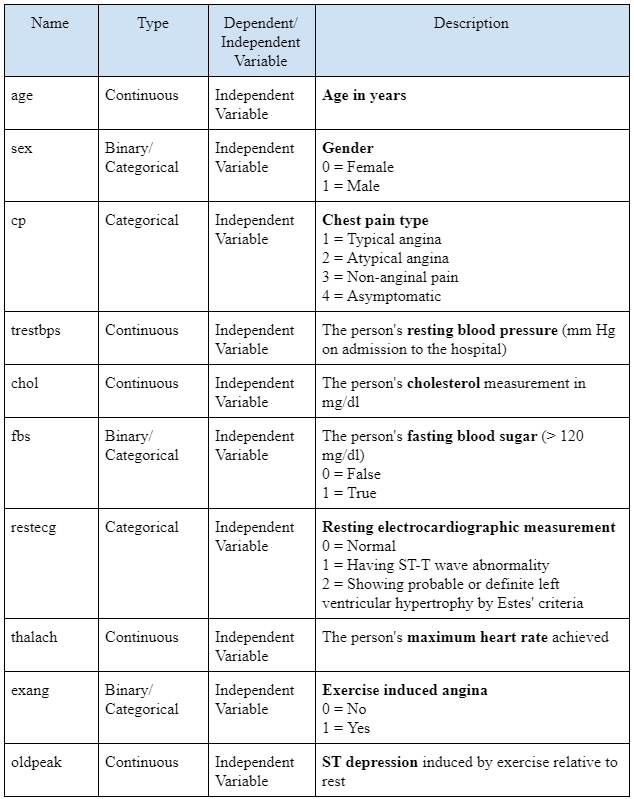
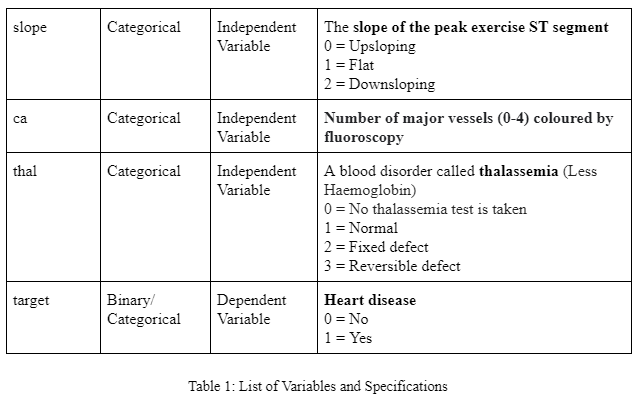

Load dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read data into a DataFrame
df = pd.read_csv('DS heart dataset.csv') # jupyter
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS heart dataset.csv') # colab
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Explonary Data Analysis (EDA)

## 2.1 Dependent Variable 

### 2.1.1 target (Heart Disease)

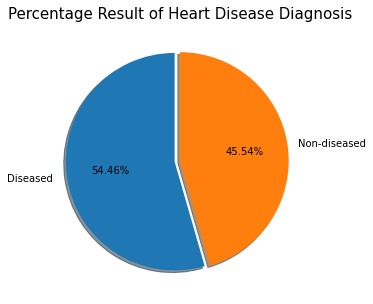

In [4]:
# Print Pie Chart
plt.figure(figsize=(5,5))
disease = len(df[df['target'] == 1])
non_disease = len(df[df['target'] == 0])
plt.title("Percentage Result of Heart Disease Diagnosis",fontsize = 15)
plt.pie(x=[disease, non_disease], explode=[0.05, 0], labels=['Diseased ', 'Non-diseased'], autopct='%1.2f%%', shadow=True,startangle = 90)
plt.show()


In [5]:
# change value from int to string 
df['target'] = df['target'].replace(1, 'Disease')
df['target'] = df['target'].replace(0, 'No Disease')

In [6]:
target = df.target.value_counts()
print(target)

Disease       165
No Disease    138
Name: target, dtype: int64


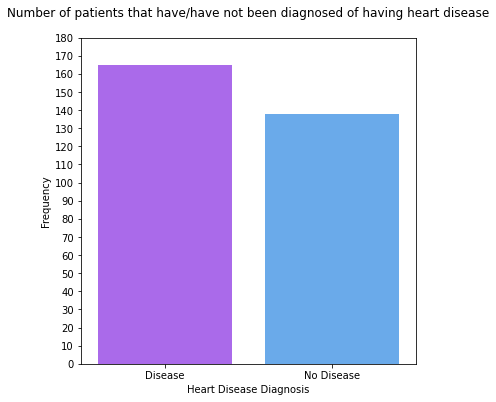

In [7]:
# Bar chart 
import matplotlib.pyplot as plt
import seaborn as sns


# Print Bar Chart 
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = 'target', palette = 'cool_r')

plt.title("Number of patients that have/have not been diagnosed of having heart disease\n") 
plt.ylabel("Frequency")
plt.xlabel("Heart Disease Diagnosis")
plt.yticks(np.arange(0,190,10))

plt.show()

Based on the chart above, we know that of 303 patients, 165 of them have heart disease while the rest of the patients (138) do not have heart disease. In terms of percentage, 54.46% of the patients have been diagnosed of having heart disease while 45.54% of them have not

In [8]:
k=df.groupby(['target']).mean()
k.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
Disease,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212
No Disease,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478


In [9]:
# replace to int value 
df['target'] = df['target'].replace('Disease',1)
df['target'] = df['target'].replace('No Disease',0)

## 2.2 Independent Variable 

### 2.2.1 age

In [10]:
summary_age = df.age.describe()

print('Summary of Age')
print('--------------------')
print(summary_age)


Summary of Age
--------------------
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


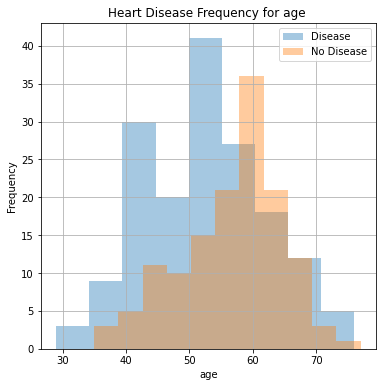

In [11]:
age_disease = df.loc[df["target"] == 1]
age_no_disease = df.loc[df["target"] == 0]

plt.figure(figsize=(6,6)) 
sns.distplot(age_disease["age"],kde = False)
sns.distplot(age_no_disease["age"],kde = False)
plt.legend(["Disease", "No Disease"])
plt.title('Heart Disease Frequency for age ')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The sample data is taken from the patients whose ages ranging from 29 to 77 years old. From the figures above, it shows that the total number of patients who do not have heart disease is larger than the number of patients who have heart disease. Most of the patients who have been diagnosed of having heart disease are aged from 57 years old to 65 years old. While the number of heart diseases is the least among the patients aged from 72 to 77 years.


### 2.2.2 sex

In [12]:
# Change value name 
df['sex'] = df['sex'].replace(1, 'Male')
df['sex'] = df['sex'].replace(0, 'Female')

In [13]:
sex = df.sex.value_counts()
print(sex)

Male      207
Female     96
Name: sex, dtype: int64


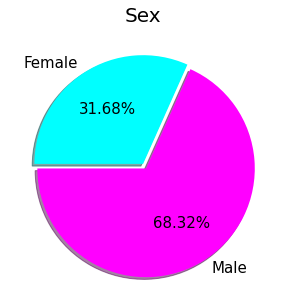

In [14]:
# Population of sex 

plt.figure(figsize=(5,5)) 
sex.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0), cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title('Sex',fontsize = 20)
plt.xlabel('')
plt.ylabel('')

plt.show()

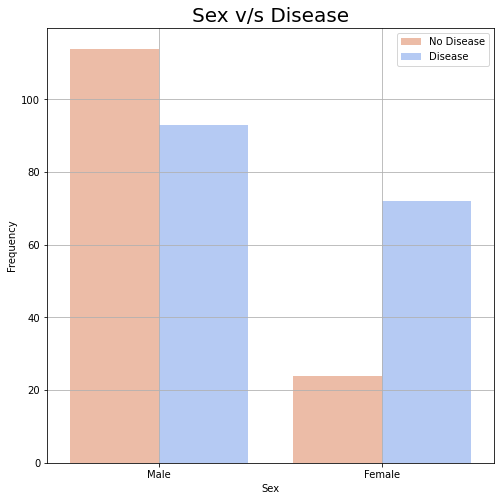

In [15]:
# relation between sex and target 

plt.figure(figsize=(8,8)) 
sns.countplot(data = df, x ='sex', hue = 'target', palette = 'coolwarm_r')

plt.legend(['No Disease', 'Disease'])
plt.title('Sex v/s Disease',fontsize = 20)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the figures above, approximately 93 male patients and 72 female patients have been diagnosed of having heart disease. 

On the other hand, 114 male patients and 24 female patients have not been diagnosed with heart disease.


### 2.2.3 cp

In [16]:
# Change value name 
df['cp'] = df['cp'].replace(0, 'Typical Angina')
df['cp'] = df['cp'].replace(1, 'Atypical Angina')
df['cp'] = df['cp'].replace(2, 'Non-anginal Pain')
df['cp'] = df['cp'].replace(3, 'Asymptomatic')

In [17]:
cp = df.cp.value_counts()
print(cp)

Typical Angina      143
Non-anginal Pain     87
Atypical Angina      50
Asymptomatic         23
Name: cp, dtype: int64


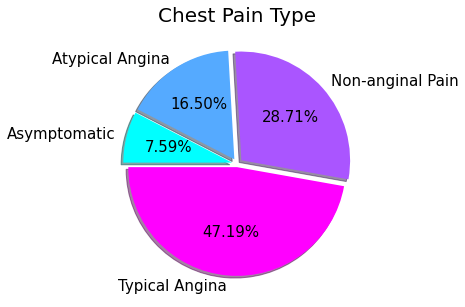

In [18]:
# Population of cp

plt.figure(figsize=(5,5)) 
cp.plot.pie( autopct = '%1.2f%%', shadow = True, explode=[0.03,0.05,0.05,0.05], cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title('Chest Pain Type',fontsize = 20)
plt.xlabel('')
plt.ylabel('')

plt.show()

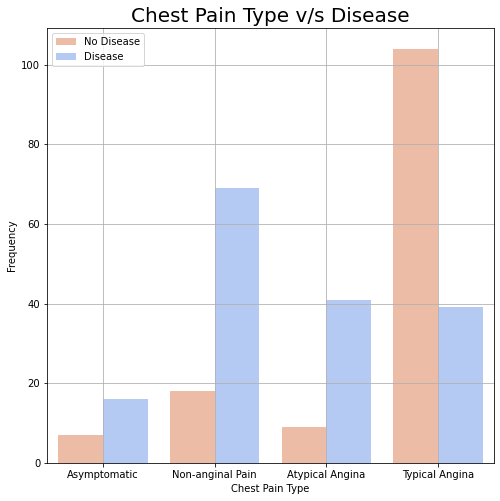

In [19]:
plt.figure(figsize=(8,8)) 
sns.countplot(data= df, x='cp',hue='target', palette = 'coolwarm_r')

plt.title('Chest Pain Type v/s Disease',fontsize = 20)
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.grid()    
plt.show()

From the bar chart above, we can see that, of 23 patients who have Asymptomatic chest pain, 7 of them do not have heart disease while the rest of them have heart disease. 

Besides, 69 patients who have Non-anginal chest pain have been diagnosed of having heart disease while 18 of them have not. Furthermore, there are a total of 50 patients who suffer from Atypical chest pain. Among 50 of them, 9 do not have heart disease while 41 have heart disease. 

Lastly, for patients who have Typical angina chest pain, 104 of them do not suffer from heart disease while 39 of them do have heart disease


### 2.2.4 trestbps

In [20]:
summary_trestbps= df.trestbps.describe()

print('Summary of Resting Blood Pressure')
print('---------------------------------')
print(summary_trestbps)

Summary of Resting Blood Pressure
---------------------------------
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


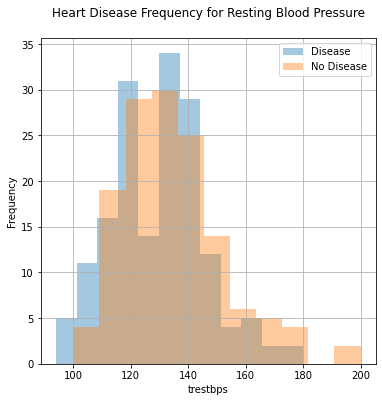

In [21]:
trestbps_disease = df.loc[df["target"] == 1]
trestbps_no_disease = df.loc[df["target"] == 0]

plt.figure(figsize=(6,6)) 
sns.distplot(trestbps_disease["trestbps"],kde = False)
sns.distplot(trestbps_no_disease["trestbps"],kde = False)
plt.legend(["Disease", "No Disease"])
plt.title('Heart Disease Frequency for Resting Blood Pressure\n')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the figures above, the number of patients getting heart disease increases when the resting blood pressure increases from 94mm Hg to approximately 125mm Hg. It then drops drastically when the resting blood pressure is between 125 to 130mm Hg. The numbers then increase again drastically and reach a peak of 33 patients. When the resting blood pressure is around 138mm Hg, the number of patients getting heart disease decreases gradually until the resting blood pressure reaches 180mm Hg. 


### 2.2.5 chol
cholesterol 

In [22]:
summary_chol= df.chol.describe()

print('Summary of cholesterol ')
print('--------------------')
print(summary_chol)

Summary of cholesterol 
--------------------
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


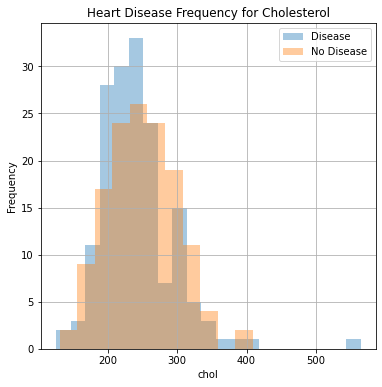

In [23]:
chol_disease = df.loc[df["target"] == 1]
chol_no_disease = df.loc[df["target"] == 0]

plt.figure(figsize=(6,6)) 
sns.distplot(chol_disease["chol"],kde = False)
sns.distplot(chol_no_disease["chol"],kde = False)

plt.legend(["Disease", "No Disease"])
plt.title('Heart Disease Frequency for Cholesterol')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The number of heart disease cases increases gradually when the cholesterol level increases from 126mg/dl to 128mg/dl. It then increases drastically and reaches a peak of 33 patients when the cholesterol level is approximately 250mg/dl. After that, the numbers decrease when the cholesterol level is between 128mg/dl and 420mg/dl. There are approximately 2 patients who have heart disease between the cholesterol level of 550mg/dl to 570mg/dl.

### 2.2.6 fbs
fasting blood sugar

In [24]:
fbs = df.fbs.value_counts()

print('0 -> less than or equal to 120 mg/dl')
print('1 -> more than 120 mg/dl \n')
print(fbs)


0 -> less than or equal to 120 mg/dl
1 -> more than 120 mg/dl 

0    258
1     45
Name: fbs, dtype: int64


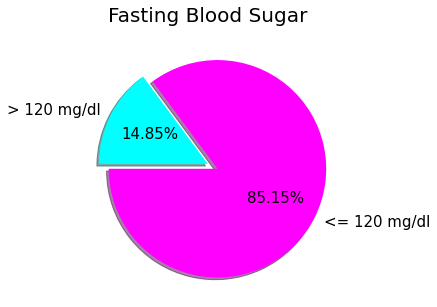

In [25]:
# Population of fbs
plt.figure(figsize=(5,5)) 
fbs.plot.pie(labels = ['<= 120 mg/dl', '> 120 mg/dl'],autopct = '%1.2f%%', shadow = True, explode = (0.1,0), cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title('Fasting Blood Sugar',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

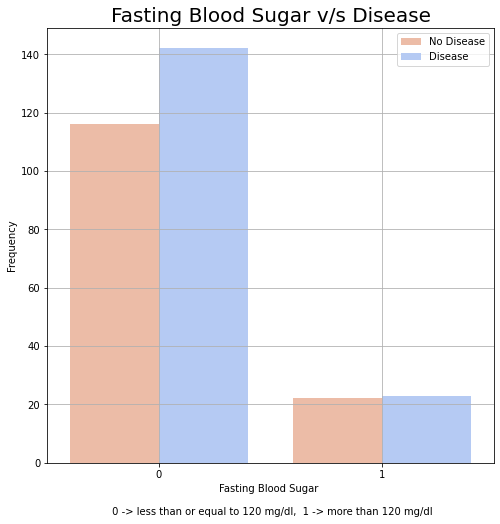

In [26]:
plt.figure(figsize=(8,8)) 
sns.countplot(data = df, x ='fbs', hue = 'target', palette = 'coolwarm_r')

plt.legend(['No Disease', 'Disease'])

plt.title('Fasting Blood Sugar v/s Disease',fontsize = 20)
plt.xlabel('Fasting Blood Sugar \n\n 0 -> less than or equal to 120 mg/dl,  1 -> more than 120 mg/dl')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Approximately 116 patients who have less than or equal to 120mg/dl fasting blood sugar do not have heart disease, while 142 of them have heart disease. 

On the other hand, of all the patients who have more than 120mg/dl fasting blood sugar, 22 of them do not have heart disease while the 23 of them have heart disease. The difference between the number of patients who have and do not have heart disease is only 1.


### 2.2.7 restecg
Resting electrocardiographic measurement

In [27]:
restecg = df.restecg.value_counts()
print(restecg)

1    152
0    147
2      4
Name: restecg, dtype: int64


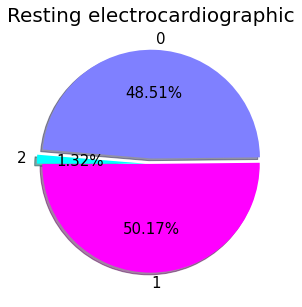

In [28]:
# Population of restecg

plt.figure(figsize=(5,5)) 
restecg.plot.pie(autopct = '%1.2f%%', shadow = True,explode=[0,0.05,0.05], cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title('Resting electrocardiographic',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

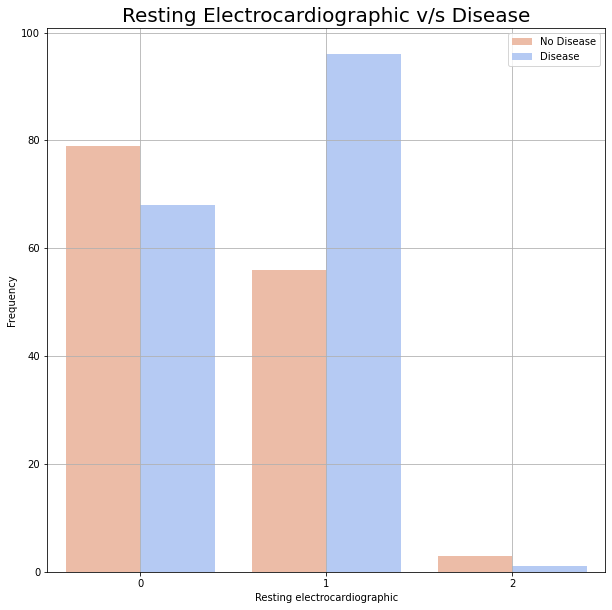

In [29]:
plt.figure(figsize=(10,10)) 

sns.countplot(data = df, x ='restecg', hue ='target', palette = 'coolwarm_r')

plt.title('Resting Electrocardiographic v/s Disease',fontsize = 20)
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Resting electrocardiographic')
plt.ylabel('Frequency')
plt.grid()
plt.show()

There are a total of 147 patients who have normal resting electrocardiographic measurement (0). Of all, 79 of them do not have heart disease while 68 of them do have. 

Besides, 56 patients who have ST-T wave abnormality (1) do not have heart disease while 96 of them have heart disease. 

Lastly, of 4 patients that show probable or definite left ventricular hypertrophy by Estes' criteria (2), only one has been diagnosed of having heart disease while the rest of the 3 patients do not have heart disease.

### 2.2.8 thalach
maximum heart rate

In [30]:
summary_thalach= df.thalach.describe()

print('Summary of Maximum Heart Rate')
print('-----------------------------')
print(summary_thalach)

Summary of Maximum Heart Rate
-----------------------------
count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


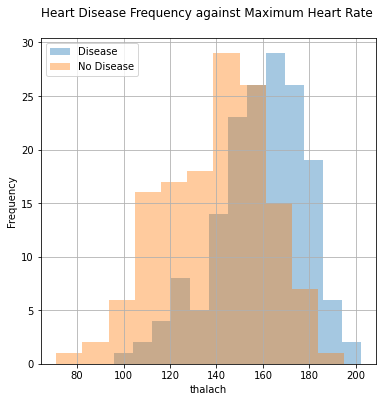

In [31]:
thalach_disease = df.loc[df["target"] == 1]
thalach_no_disease = df.loc[df["target"] == 0]

plt.figure(figsize=(6,6)) 
sns.distplot(thalach_disease["thalach"],kde = False)
sns.distplot(thalach_no_disease["thalach"],kde = False)

plt.legend(["Disease", "No Disease"])
plt.title('Heart Disease Frequency against Maximum Heart Rate \n')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The sample maximum heart rate taken from all 303 patients range from 71 to 202 beats per minute (BPM). The number of patients getting heart disease increases gradually when the maximum heart rate is between 138 and 170BPM. It then decreases until the maximum heart rate is 202BPM. We can conclude that the maximum heart rate of most of the patients who have heart disease is between 138 and 194. The patients are likely to have heart disease if their maximum heart rate falls within this range.


### 2.2.9 exang
Exercise induced angina 

In [32]:
# Change value name 
df['exang'] = df['exang'].replace(1, 'Yes')
df['exang'] = df['exang'].replace(0, 'No')

In [33]:
exang = df.exang.value_counts()
print(exang)

No     204
Yes     99
Name: exang, dtype: int64


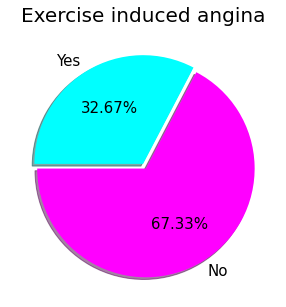

In [34]:
# Population of exang 

plt.figure(figsize=(5,5)) 
exang.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0), cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title('Exercise induced angina',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

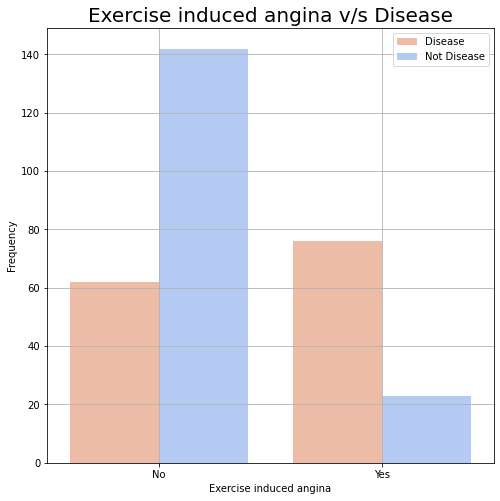

In [35]:
plt.figure(figsize=(8,8)) 
sns.countplot(data = df, x ='exang', hue = 'target', palette = 'coolwarm_r')

plt.legend(['Disease', 'Not Disease'])

plt.title('Exercise induced angina v/s Disease',fontsize = 20)
plt.xlabel('Exercise induced angina')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the figures above, we can see that 62 patients who do not have exercise induced angina do not have heart disease while 142 patients who do not have exercise induced angina have been diagnosed of having heart disease. 

On the other hand, of 99 patients who have exercise induced angina, 76 of them do not have heart disease while 23 of them have heart disease.


### 2.2.10 oldpeak
ST depression induced by exercise relative to rest

In [36]:
summary_oldpeak= df.oldpeak.describe()

print('Summary of Oldpeak')
print('--------------------')
print(summary_oldpeak)

Summary of Oldpeak
--------------------
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


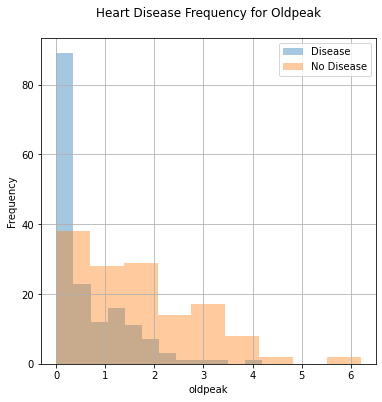

In [37]:
oldpeak_disease = df.loc[df["target"] == 1]
oldpeak_no_disease = df.loc[df["target"] == 0]

plt.figure(figsize=(6,6)) 
sns.distplot(oldpeak_disease["oldpeak"],kde = False)
sns.distplot(oldpeak_no_disease["oldpeak"],kde = False)
plt.legend(["Disease", "No Disease"])
plt.title('Heart Disease Frequency for Oldpeak\n')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the historgram above, we know that there are more patients whose ST depression (oldpeak) is between 0 and 0.3 are having heart disease. Then, the number of patients having heart diseases decreases when the ST depression moves from 0.3 to 4.2.


### 2.2.11 slope
The slope of the peak exercise ST segment 

In [38]:
df['slope'] = df['slope'].replace(0, 'Upsloping')
df['slope'] = df['slope'].replace(1, 'Flat')
df['slope'] = df['slope'].replace(2, 'Downsloping')

In [39]:
slope = df.slope.value_counts()
print(slope)

Downsloping    142
Flat           140
Upsloping       21
Name: slope, dtype: int64


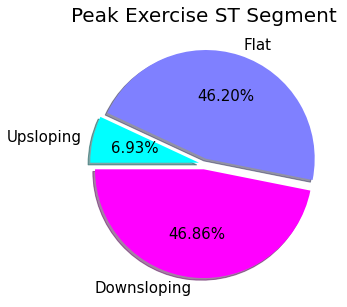

In [40]:
# Population of slope 

plt.figure(figsize=(5,5)) 
slope.plot.pie(autopct = '%1.2f%%', shadow = True, explode = [0.05,0.05,0.05], cmap = 'cool_r',startangle = 180,fontsize = 15)
plt.title('Peak Exercise ST Segment',fontsize = 20)
plt.xlabel('')
plt.ylabel('')

plt.show()

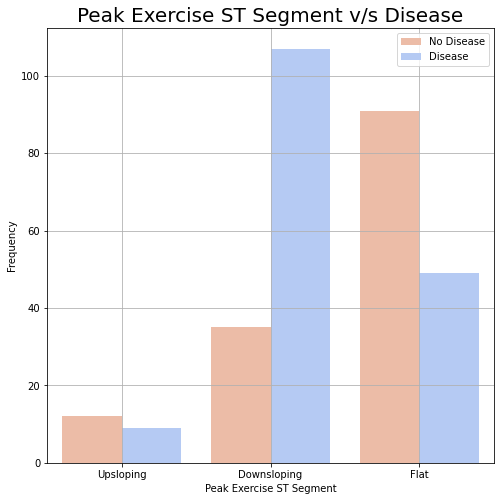

In [41]:
plt.figure(figsize=(8,8)) 
sns.countplot(data = df, x ='slope', hue ='target', palette = 'coolwarm_r') # palette = set1

plt.title('Peak Exercise ST Segment v/s Disease',fontsize = 20)
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Peak Exercise ST Segment')
plt.ylabel('Frequency')

plt.grid()

There are 3 types of slope of the peak exercise ST segment, including upsloping, downsloping and flat. From the figures above, we know that, of 21 patients that are categorised into the group upsloping, 12 of them do not have heart disease while the rest of the 9 patients have heart disease.

Moreover, for the patients in the group downsloping, 35 of them do not have heart disease while 106 of them have heart disease. 

Furthermore, there are 140 patients categorised into the group flat. 91 of these patients have not been diagnosed of having heart disease while 49 of them have been diagnosed of having heart disease.


### 2.2.12 ca
Number of major vessels (0-4) coloured by fluoroscopy

In [42]:
ca = df.ca.value_counts()
print(ca)

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


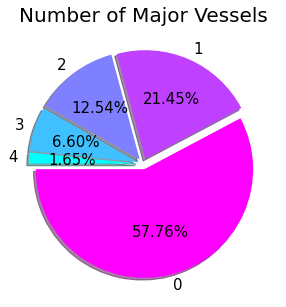

In [43]:
# Population of ca

plt.figure(figsize=(5,5)) 
ca.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0.05,0.05,0.05,0.05), cmap = 'cool_r',startangle =180, fontsize = 15)
plt.title('Number of Major Vessels',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

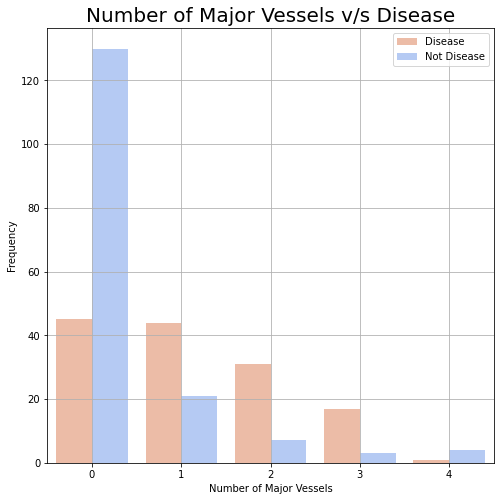

In [44]:
plt.figure(figsize=(8,8)) 
sns.countplot(data = df, x ='ca', hue = 'target', palette = 'coolwarm_r')

plt.legend(['Disease', 'Not Disease'])

plt.title('Number of Major Vessels v/s Disease',fontsize = 20)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the bar chart above, we know that there are 5 groups of different numbers of major vessels, starting from 0 to 4.  In the first group (0 major vessels coloured by fluoroscopy), 45 patients do not have heart disease while 130 patients have heart disease.

Besides, in the second group (1 major vessel coloured by fluoroscopy), out of 65 patients, 44 of them do not have heart disease while 21 of them have heart disease.

Moreover, among 65 patients who have two major vessels coloured by fluoroscopy, 31 of them do not have heart disease while 7 of them have heart disease. 

Apart from that, among 20 patients who have three major vessels coloured by fluoroscopy, 17 of them do not have heart disease while 3 of them have heart disease. 

Lastly, there is only 1 person in the fifth group (4 major vessels coloured by fluoroscopy) who has not been diagnosed of having heart disease. While the rest of the 4 patients have been diagnosed of having heart disease.


### 2.2.13 thal
Thalassemia (Less Haemoglobin)

In [45]:
# Original dataset thal 
ori_thal = df.thal.value_counts()
print(ori_thal)

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [46]:
# to drop the row which are 0
thal_ori_row = df[df.thal < 1]
df.drop(df[df.thal < 1].index, inplace=True)

In [47]:
# Change value name
df['thal'] = df['thal'].replace(1, 'Normal')
df['thal'] = df['thal'].replace(2, 'Fixed defect')
df['thal'] = df['thal'].replace(3, 'Reversible defect')

In [48]:
# new thal after frop the row 0
new_thal = df.thal.value_counts()
print(new_thal)

Fixed defect         166
Reversible defect    117
Normal                18
Name: thal, dtype: int64


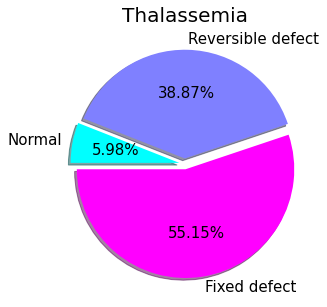

In [49]:
plt.figure(figsize=(5,5)) 
new_thal.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0.05,0.05), cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title('Thalassemia',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

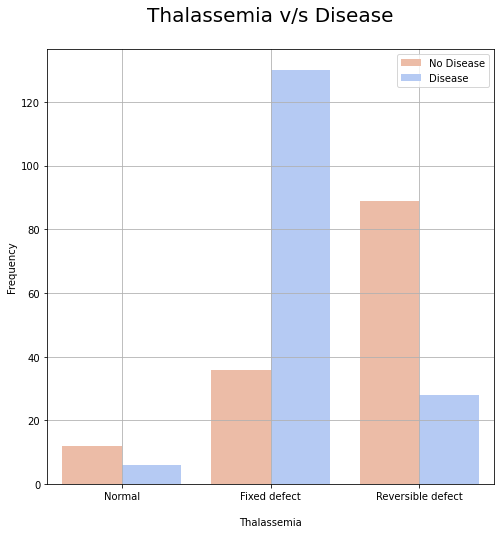

In [50]:
plt.figure(figsize=(8,8)) 
sns.countplot(data = df, x ='thal', hue = 'target', palette = 'coolwarm_r')

plt.legend(['No Disease', 'Disease'])

plt.title('Thalassemia v/s Disease\n',fontsize = 20)
plt.xlabel('\nThalassemia')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Based on the above figures, there are 12 normal patients who do not have heart disease while 6 normal patients have heart disease.

Besides, of 166 patients that are categorised into the “fixed defect of thalassemia” group, 36 of them do not have heart disease while 130 of them have heart disease.

Moreover, there are a total of 117 patients that are grouped under the “reversible defect” group. 89 patients from this group have not been diagnosed of having heart disease while 28 of them have been diagnosed of having heart disease.



#### Move back original values 

In [51]:
thal_ori_row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,Female,Non-anginal Pain,128,216,0,0,115,No,0.0,Downsloping,0,0,1
281,52,Male,Typical Angina,128,204,1,1,156,Yes,1.0,Flat,0,0,0


In [52]:
df = pd.concat([thal_ori_row, df])
df.shape

(303, 14)

In [53]:
# Assign the int value back

df['sex'] = df['sex'].replace('Male', 1)
df['sex'] = df['sex'].replace('Female', 0)

df['cp'] = df['cp'].replace('Typical Angina', 0)
df['cp'] = df['cp'].replace('Atypical Angina', 1)
df['cp'] = df['cp'].replace('Non-anginal Pain', 2)
df['cp'] = df['cp'].replace('Asymptomatic', 3)

df['slope'] = df['slope'].replace('Upsloping', 0)
df['slope'] = df['slope'].replace('Flat', 1)
df['slope'] = df['slope'].replace('Downsloping', 2)

df['exang'] = df['exang'].replace('Yes', 1)
df['exang'] = df['exang'].replace('No', 0)

df['thal'] = df['thal'].replace('Normal', 1)
df['thal'] = df['thal'].replace('Fixed defect', 2)
df['thal'] = df['thal'].replace('Reversible defect', 3)

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
1,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
4,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


# 3 Data Preparation

## 3.1 Selecting Data
Selecting items (rows):
In our dataset, there are some outliers which seriously affect the accuracy of our prediction. So, we will remove those outliers in our dataset in order to gain a more accurate and precise prediction when performing modelling. Besides, we will also check whether there are any missing values, and we will take correspondence measures either to remove or replace it with mean values (if any). Please refer to 3.2 Data Cleaning for further elaboration and explanation.

Selecting attributes (columns):
In our data set, there are 14 features (columns), and the last feature called "target" is selected as the outcome. The rest 13 features in our dataset are selected as the independent variable to predict the outcome. During the data preparation stage, the categorical and numerical data have been identified and there is no qualitative data contained in our dataset. Thus, no label encoding is needed as all the data in the dataset has already been pre-encoded. The continuous data will then undergo the data normalisation process so that the final value is between 0 and 1.


## 3.2 Data Cleaning
We usually can't have any missing values in our dataset if we want to use them for predictive modeling. This is because when performing predictive modeling, it may affect accuracy and precision, thereby reducing the reliability and trustworthiness towards the result. Therefore, we will check whether there are any missing values in our dataset first. In our case, there are no missing values in our dataset. Besides, we will also check for the occurrence of outliers and remove the outliers whose z-score values are more than 3. In total, we have successfully removed 16 outliers from the dataset.

### 3.2.1 Check Missing Values

In [56]:
# Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Missing Value in Percentage 

In [57]:
# how many total missing values do we have
t_cells = np.product(df.shape)              # 14*303 = 4242 
t_missing = df.isnull().sum().sum()         # total missing value for all the varible

# percent of data that is missing
percent_missing = (t_missing/t_cells) * 100

print("Percentage of missing value: {:.2f}%".format(percent_missing))

Percentage of missing value: 0.00%


In [58]:
# Print the info in the DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

## 3.3 Feature Extraction / Engineering & Feature Scaling
In this stage, we will split the dataset into 2 clusters based on their types of variables. 1 cluster for continuous data and another cluster for categorical data. After splitting the dataset, we will then normalise the continuous data to convert its values to between 1 and 0. Lastly, we will combine the normalised data back with the categorical data and proceed to the process of modelling.


### 3.3.1 Feature Extraction / Engineering 

In [59]:
# Move all the categorical feature data into a table
x_categorical = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

# Move all the continous feature data into a table
x_continuos = df.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'], axis = 1)

# Retrieve the 'target' value for prediction
y_target = df.target.values


### 3.3.2 Feature Scaling

In [60]:
# Normalization on the continous feature data
x_continuos_normalised = (x_continuos - np.min(x_continuos)) / (np.max(x_continuos) - np.min(x_continuos)).values

In [61]:
# Print the normalised result
print(x_continuos_normalised)


          age  trestbps      chol   thalach   oldpeak
0    0.500000  0.320755  0.205479  0.335878  0.000000
1    0.479167  0.320755  0.178082  0.648855  0.161290
2    0.708333  0.481132  0.244292  0.603053  0.370968
3    0.166667  0.339623  0.283105  0.885496  0.564516
4    0.250000  0.339623  0.178082  0.770992  0.225806
..        ...       ...       ...       ...       ...
298  0.583333  0.433962  0.262557  0.396947  0.032258
299  0.333333  0.150943  0.315068  0.465649  0.193548
300  0.812500  0.471698  0.152968  0.534351  0.548387
301  0.583333  0.339623  0.011416  0.335878  0.193548
302  0.583333  0.339623  0.251142  0.786260  0.000000

[303 rows x 5 columns]


## 3.4 Data Combination

In [62]:
# Combine the normalised data back to original DataFrame
# Now, all the features data are categorical
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = x_continuos_normalised

# Print the combined result
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.500000,0,2,0.320755,0.205479,0,0,0.335878,0,0.000000,2,0,0,1
1,0.479167,1,0,0.320755,0.178082,1,1,0.648855,1,0.161290,1,0,0,0
2,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
3,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
4,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1


## 3.5 Check Outliers

### 3.5.1 Detect Outlier 

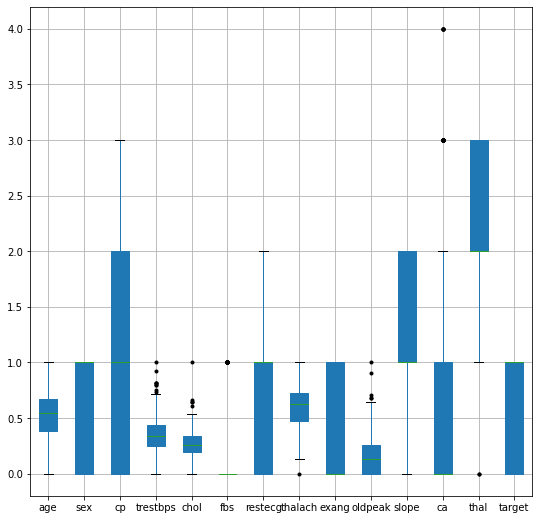

In [63]:
# Detect outliers
import matplotlib.pyplot as plt

plt.subplots(figsize=(9,9))
df.boxplot(patch_artist=True, sym="k.")

### 3.5.2 Solving Outlier 

In [64]:
from scipy import stats
import numpy as np

# Print the Z-Score
z = np.abs(stats.zscore(df))
print(z)

[[0.15069166 1.46841752 1.00257707 ... 0.71442887 3.78482354 0.91452919]
 [0.26098049 0.68100522 0.93851463 ... 0.71442887 3.78482354 1.09345881]
 [0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [65]:
# Print the Z-Score > 3
threshold = 3
print(np.where(z > 3))

(array([  0,   1,  30,  86,  93, 159, 164, 165, 205, 221, 222, 224, 247,
       249, 252, 273], dtype=int64), array([12, 12,  4,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7],
      dtype=int64))


In [66]:
print(z[272][7])

0.20320973903834003


In [67]:
df.shape

(303, 14)

In [68]:
# Remove outliers (Z-Score > 3)
df=df.drop(df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)].index)

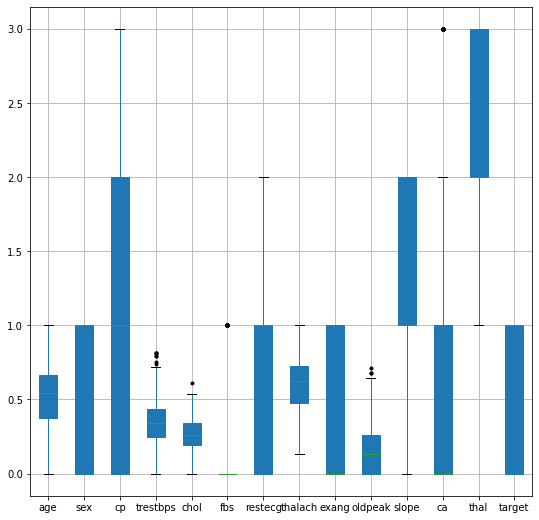

In [69]:
# Detect outliers after removing
plt.subplots(figsize=(9,9))
df.boxplot(patch_artist=True, sym="k.")

In [70]:
df.shape

(287, 14)

# 4 Modelling

## 4.1 Splitting Dataset into Training and Testing Set

Perform 80/20 Data split

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [71]:
# Retrive the value for train_test_split
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2,random_state=0)

Before carrying out data modelling by using different algorithms, we need to divide the rows of the data into two different sets which are training set and testing set. A certain percentage of data will be used to feed and train the system or machine so that it can learn the pattern of the data and generate better results when different data is being fed. While another percentage of data will be used as a testing set for us to evaluate whether the system is able to deal with different kinds of data and produce valid and reliable results.

In this assignment, we have decided to fix 80% of the dataset as the training data while 20% as the testing data. Under the training data, there will be two variables which are x-train and y-train. Similarly, the testing set also consists of both dependent and independent variables such as x-test and y-test. 


## 4.2 Algorithm

### 4.2.1 K-Nearest Neighbours (KNN)

K-Nearest Neighbor algorithm (KNN) is a non-parametric method that is used for classification or regression in pattern recognition. KNN is a model that helps to determine the data from the Nonparametric Statistics where all the data have a specified distribution but with unspecified distribution’s parameters. In these cases, the input consists of the K closest training examples in the feature space (also known as the vector space); the output also depends on whether KNN is used for the classification or the regression.

In KNN classification, the output is Class membership. That object will be classified by a majority vote of its neighbors, with the case being assigned to the most common class among its K nearest neighbors by measuring with the distance function such as the Euclidean formula, Manhattan Formula and the Minkowski Formula. For example, if K=1, then the case will be assigned to the class of its nearest neighbor.

In KNN regression, the output is the property value for the object. It is a simple implementation to calculate the average value or the average of the numerical target of the K-nearest neighbors. There's also another method which is using the inverse distance to weight the average of the K nearest neighbors. The similarity of KNN regression and KNN Classification is they use the same distance functions.

It is also called the Lazy Algorithm as it does not need any training data points for model generation. In the training phase, all training data is used which makes the testing phase slower and costlier. The function will be approximated locally and all computation is deferred until function evaluation. As this algorithm relies on distance, normalizing the training data can improve its accuracy.

In KNN, K is the number of nearest neighbors and also the core deciding factor. If the number of classes is 2, K will generally be an odd number. When K=1, then the algorithm is known as the nearest neighbor algorithm. From our case study, we found that the K value of 5 and 12 which have the lowest mean square error (refer to the following code) and it means that it will provide the highest accuracy as compared to other values. As we know the common K value is an odd number. Therefore, we will take 5 as the K value and conclude that the classifiers from the training set are more accurate when the value of K is 5.


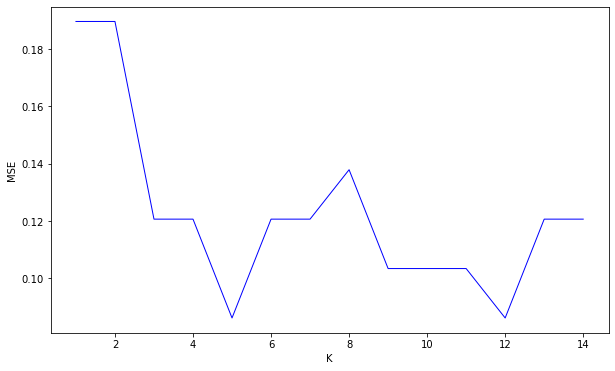

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm, metrics

mse = []

# to determine k-value  
for i in range(1, 15):
  # Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors = i)

  #Train the model using the training sets
  knn.fit(x_train, y_train)

  #Predict the response for test dataset
  y_pred_knn = knn.predict(x_test)

  mse.append(np.mean(y_pred_knn != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15), mse, color='blue', linewidth=1)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()


In [74]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(x_test)

knn_acc_test = (knn.score(x_test, y_test)) * 100
knn_acc_train = (knn.score(x_train, y_train)) * 100

#Model Accuracy: How often is the classifier correct?
print('KNN accuracy for test set: {:.2f}%'.format(knn_acc_test))  # accuracy in percentage
print('KNN accuracy for training set: {:.2f}%'.format(knn_acc_train))
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))


KNN accuracy for test set: 91.38%
KNN accuracy for training set: 88.65%


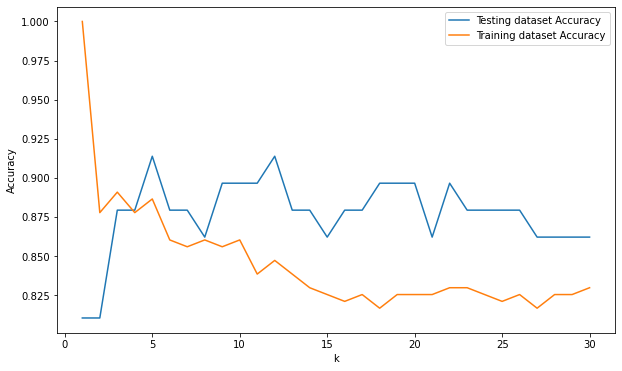

In [75]:
neighbors = np.arange(1, 31) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(x_train, y_train) 
    test_accuracy[i] = knn.score(x_test, y_test) 

plt.figure(figsize=(10,6))
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('k') 
plt.ylabel('Accuracy') 
plt.show()

In [76]:
# Kfold cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, x_data, y, cv=10)
print(score)
print("\nMean Score:", score.mean())

[0.82758621 0.82758621 0.82758621 0.89655172 0.86206897 0.82758621
 0.86206897 0.85714286 0.67857143 0.85714286]

Mean Score: 0.8323891625615764


In [77]:
from sklearn.metrics import classification_report, confusion_matrix
knn_cm = confusion_matrix(y_test,y_pred_knn)
knn_cm

array([[25,  4],
       [ 1, 28]], dtype=int64)

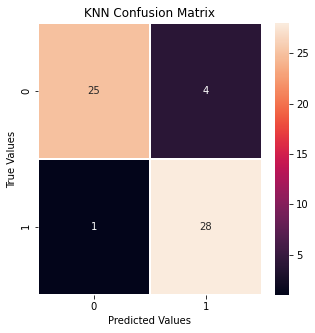

In [78]:
# Visualizing Confusion Matrix using Heatmap
import matplotlib.pyplot as plt

plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True,linewidths=0.5)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(classification_report(y_test, y_pred_knn))

knn_pre = precision_score(y_test,y_pred_knn) * 100 
knn_rec = recall_score(y_test,y_pred_knn) * 100 
knn_f1 = f1_score(y_test,y_pred_knn) * 100 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.88      0.97      0.92        29

    accuracy                           0.91        58
   macro avg       0.92      0.91      0.91        58
weighted avg       0.92      0.91      0.91        58



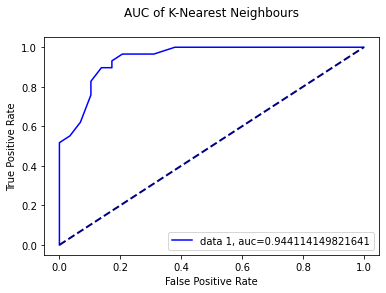

In [80]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
knn_auc = metrics.roc_auc_score(y_test, y_pred_proba) 
plt.plot(fpr,tpr,label="data 1, auc="+str(knn_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of K-Nearest Neighbours\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

###  4.2.2 Logistic Regression (LR)

Logistic regression is one of the most appropriate regression analyses when conducting the dependent variables which are dichotomous, as known as the binary. It is also known as a classification algorithm as it used to assign observations to a discrete set of classes.

Like all regression analyses, the logistic regression is a type of predictive analysis. It is used to describe the data and provide an explanation towards the relationship between one dependent binary variable and one or more ordinal, nominal, interval or ratio-level independent variables. 

However, it could not output continuous number values like linear regression. Its outputs are from returning a probability value by using the logistic sigmoid function which can then be mapped to two or more classes. For instance, the output result obtained from our case study is either yes or no. If the result is yes, then it indicates that the patients are having heart disease. Else, the patients are healthy and do not have heart disease.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
parameters_lr = [{'C': list(np.arange(1000, 2000, 200)),
               'fit_intercept': [True, False],
               'tol' : [1e-5,1e-4],
               'solver' : ['newton-cg','lbfgs']}]

lr_grid = GridSearchCV(lr, parameters_lr)
lr_grid.fit(x_train, y_train)

lr_acc_test = (lr_grid.score(x_test, y_test)) * 100
lr_acc_train = (lr_grid.score(x_train, y_train)) * 100

print('LR accuracy for test set: {:.2f}%'.format(lr_acc_test))
print('LR accuracy for training set: {:.2f}%'.format(lr_acc_train))


LR accuracy for test set: 87.93%
LR accuracy for training set: 85.15%


In [82]:
from sklearn import metrics
lr_cm = confusion_matrix(y_test,lr_grid.predict(x_test))
lr_cm


array([[24,  5],
       [ 2, 27]], dtype=int64)

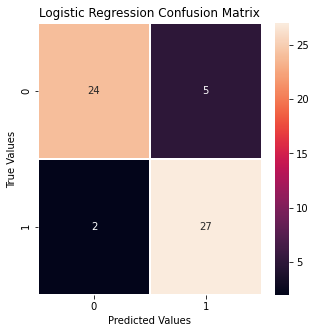

In [83]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(lr_cm,annot=True,linewidths=0.5)

plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_true_lr, y_pred_lr = y_test, lr_grid.predict(x_test)
print(classification_report(y_true_lr, y_pred_lr))

lr_pre = precision_score(y_true_lr,y_pred_lr) * 100 
lr_rec = recall_score(y_true_lr,y_pred_lr) * 100 
lr_f1 = f1_score(y_true_lr,y_pred_lr) * 100 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.84      0.93      0.89        29

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58



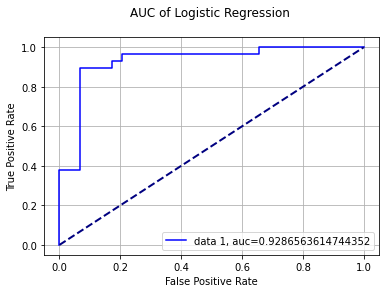

In [85]:
y_pred_proba =lr_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lr_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(lr_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Logistic Regression \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

Feature ranking:
---------------------
1. chol (4.236979)
2. oldpeak (3.881336)
3. thalach (2.734384)
4. trestbps (2.709120)
5. sex (2.121375)
6. thal (1.064965)
7. ca (1.062863)
8. cp (0.799011)
9. slope (0.634504)
10. exang (0.611789)
11. age (0.469805)
12. restecg (0.396462)
13. fbs (0.269555)


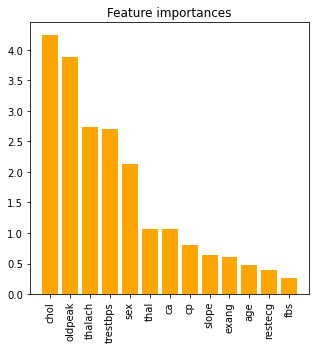

In [86]:
coefs = np.abs(lr_grid.best_estimator_.coef_[0].ravel())
indices = np.argsort(coefs)[::-1]

feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(x_data.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % coefs[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(x_data.shape[1]), coefs[indices],color="orange",  align="center")
plt.xticks(range(x_data.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, x_data.shape[1]])

plt.show()

We have conducted a feature importance calculation to check the importance and relevance of all 13 features/independent variables in predicting the output result. The above figure is the result obtained from the test, ranked from the most important to the least important. The cholesterol (chol) shows the highest score of 4.2370 among all the variables. It is then followed by ST depression induced by exercise relative to rest (oldpeak) with a score of 3.8813 and maximum heart rate (thalach) with a score of 2.7344.

While, the fasting blood sugar (fbs) is the least important feature and has a score of 0.2696. The second and third least important features goes to resting electrocardiographic measurement (restecg) with a score of 0.3965 and age (0.4698).

### 4.2.3 Decision Tree (DT)

Decision Tree algorithm belongs to the family of supervised learning algorithms. Most of the supervised learning algorithms cannot be used for solving regression and classification problems, but Decision Tree algorithms are able to do so. The goal of using a decision tree is to create a training model that is usable and able to predict the class or value of the target variable by learning simple decision rules deduced from prior data which is also the training data.

In Decision Trees,  for predicting a class label for a record we start from the top branches of the tree. At first, it will break down the data set, particularly the independent variables into smaller and smaller subsets and at the same time, a connected decision tree will be developed and increasing gradually. The final results of the models (having heart disease or not) will be with the decision nodes and leaf nodes. A decision node has two or more branches. Branches are represented as the observations of an item, each observation will be directed to the conclusion of the item’s target value which are represented by leaves. In layman terms, leaves represent the class labels and branches represent conjunctions of features that lead to those class labels.  

There are 2 types of Tree models which are the Classification Tree models and Regression Tree models. Classification type Tree models where the target variable can accept a discrete set of values; Regression type Tree models are the models that the target variable can take continuous values, typically real numbers. Thus, among the machine learning algorithms, Decision Trees can be the most famous algorithm due to its intelligibility and simplicity. 

There are several steps involved in developing a decision tree which are the Splitting and Pruning. Splitting is basically the process of partitioning the data set into subsets. It also depends on the particular variable. Pruning is the process of reducing the size of a tree by turning some branch nodes into leaf nodes while removing the leaf nodes from the original branch. Pruning is useful as classification trees may fit the training data well. However, pruning may do an inefficient job of classifying new values although it could avoid over-fitting. 

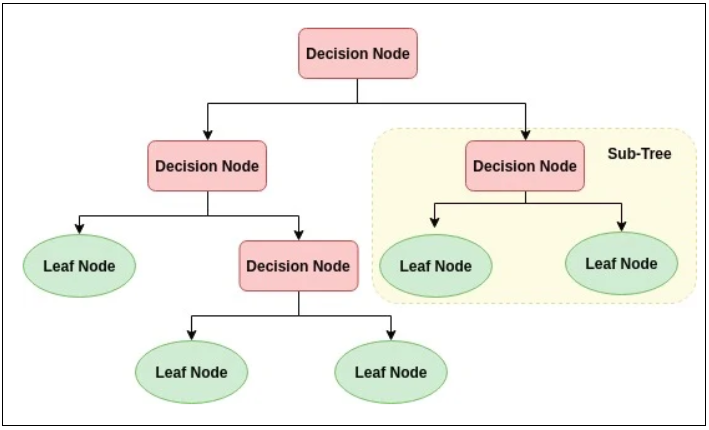

In [87]:
# Decision Tree 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

parameter_dt = {
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf' : [3,4,5],
    'min_samples_split' : range(10,500,10)
}
dt_grid = GridSearchCV(dt,parameter_dt)

#learning
dt_grid.fit(x_train, y_train)

dt_acc_test = (dt_grid.score(x_test, y_test)) * 100
dt_acc_train = (dt_grid.score(x_train, y_train)) * 100

print('DT accuracy for test set: {:.2f}%'.format(dt_acc_test))
print('DT accuracy for training set: {:.2f}%'.format(dt_acc_train))


DT accuracy for test set: 89.66%
DT accuracy for training set: 83.84%


In [88]:
from sklearn import metrics
dt_cm = confusion_matrix(y_test,dt_grid.predict(x_test))
dt_cm

array([[26,  3],
       [ 3, 26]], dtype=int64)

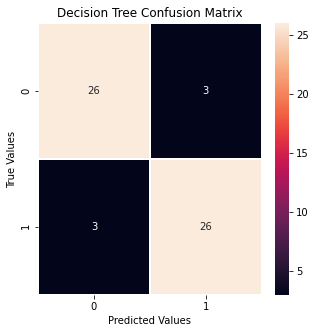

In [89]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(dt_cm,annot=True,linewidths=0.5)

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [90]:
from sklearn.metrics import classification_report

y_true_dt, y_pred_dt = y_test, dt_grid.predict(x_test)
print(classification_report(y_true_dt, y_pred_dt))

dt_pre = precision_score(y_true_dt,y_pred_dt) * 100 
dt_rec = recall_score(y_true_dt,y_pred_dt) * 100 
dt_f1 = f1_score(y_true_dt,y_pred_dt) * 100 


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.90      0.90      0.90        29

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



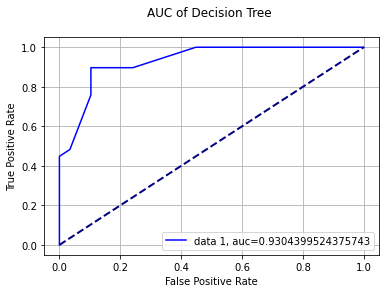

In [91]:
y_pred_proba = dt_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(dt_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Decision Tree \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

Feature ranking:
---------------------
1. ca (0.290698)
2. slope (0.253624)
3. cp (0.161346)
4. thal (0.133314)
5. chol (0.077660)
6. thalach (0.039406)
7. exang (0.035642)
8. fbs (0.008310)
9. oldpeak (0.000000)
10. restecg (0.000000)
11. trestbps (0.000000)
12. sex (0.000000)
13. age (0.000000)


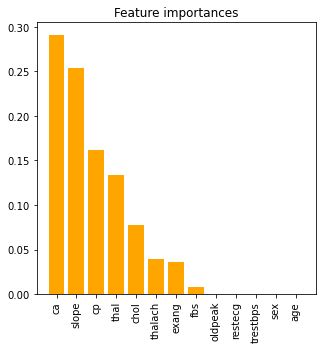

In [92]:
importances = dt_grid.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(x_data.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(x_data.shape[1]), importances[indices],color="orange",  align="center")
plt.xticks(range(x_data.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, x_data.shape[1]])
plt.show()

From the figure above, the first three features/independent variables which are important in predicting if a patient is having heart disease are Number of major vessels (0-4) colored by fluoroscopy (ca), slope of the peak exercise ST segment (slope) and chest pain type (cp) with a score of 0.2907, 0.2536 and 0.1613 respectively. 

Besides, there are 5 variables that are insignificant in predicting the target variable heart disease (target). These 5 variables include ST depression induced by exercise relative to rest (oldpeak), resting electrocardiographic measurement (restecg), resting blood pressure (resting blood pressure), sex and age. They show 0 score in this feature importance test.

### 4.2.4 Random Forest (RT)

Random Forest is one of the supervised learning algorithms. It is an ensemble learning method for classification, regression and other tasks that is operated by constructing a multitude of decision trees at training time. Decision trees also output the class that is the mode of the classes or the mean prediction of the individual trees. Random decision forests are also able to correct the decision trees’ habit of overfitting of their training sets.

The “forest” the model builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that it increases the overall results from a combination of learning models.

Random Forests assist in forming the majority of current machine learning systems as it can be used for both classification and regression problems. Random forests have nearly the same hyperparameters as a decision tree or a bagging classifier as users can easily use the classifier-class of random forest. As an example, Random Forests is a combination of multiple decision trees. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. The output generated by each of the decision trees in our case study will be either ‘yes’ or ‘no’. After that, each tree vote and the most popular class is chosen as the final result (Navlani 2018).

While growing the trees, Randomness will be added into the Random Forest model. Instead of splitting a node when searching for the most vital feature, Random Forest will search for the best feature among a random subset of features which is able to result in a wide diversity of results in a better model.

Hence, in Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node.  Using random thresholds for each feature can have the Random Tree more random than using the best possible thresholds. 


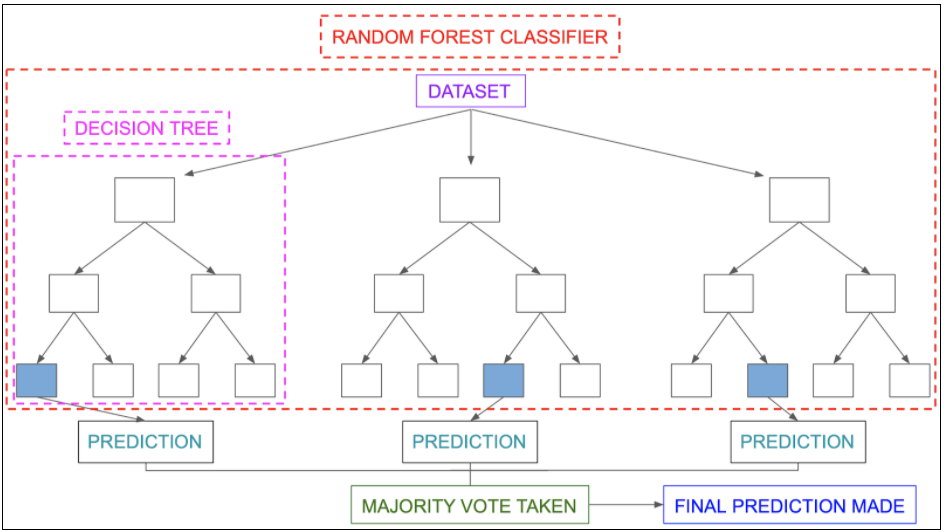


In Random Forest, n_estimators is one of the parameters that we need to apply in determining the exact value in order to increase the accuracy of the model. It is the number of trees that is to be built before taking the maximum voting or average of predictions. The n_estimator is fixed at the value of 100 by default. As we know, the more the number of trees, the better the performance of the model. However, speed may be affected when running the code. Therefore, in this model, we fix the n_estimator to 20 as the value is taken from the graph after the computation.The computation shows that 20 is the most suitable value (refer to the following code). Therefore, by applying the Random Forest algorithm, we can get a more accurate outcome. Random Forest is generally better than Decision Tree as it could solve the overfitting problem and is able to obtain more accurate results by calculating the F1-score (Refer to Part 5.1 Accuracy) in the form of percentage.


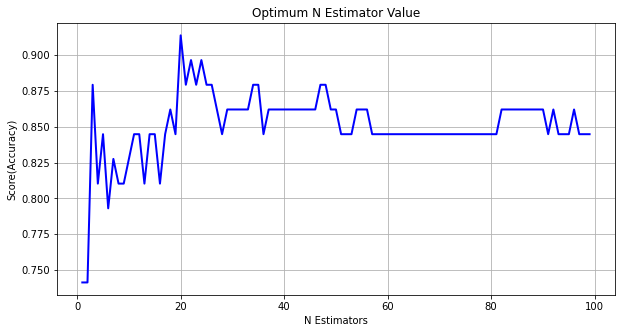

In [93]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Find Optimum n_estimators value
scores = []
for i in range(1,100):
    RFfind = RandomForestClassifier(n_estimators = i,random_state=0)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,100),scores,color="blue",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [94]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_grid = RandomForestClassifier(random_state = 0,n_estimators=20) 
rf_grid.fit(x_train, y_train)

rf_acc_test = (rf_grid.score(x_test, y_test)) * 100
rf_acc_train = (rf_grid.score(x_train, y_train)) * 100

print('RF accuracy for test set: {:.2f}%'.format(rf_acc_test))
print('RF accuracy for training set: {:.2f}%'.format(rf_acc_train))

RF accuracy for test set: 91.38%
RF accuracy for training set: 100.00%


In [95]:
from sklearn import metrics
rf_cm = confusion_matrix(y_test,rf_grid.predict(x_test))
rf_cm

array([[27,  2],
       [ 3, 26]], dtype=int64)

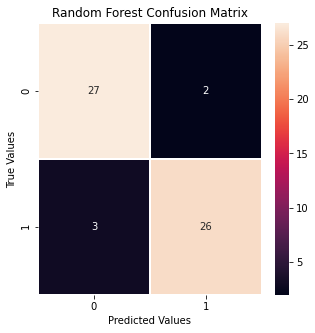

In [96]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(rf_cm,annot=True,linewidths=0.5)

plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [97]:
from sklearn.metrics import classification_report

y_true_rf, y_pred_rf = y_test, rf_grid.predict(x_test)
print(classification_report(y_true_rf, y_pred_rf))

rf_pre = precision_score(y_true_rf, y_pred_rf) * 100 
rf_rec = recall_score(y_true_rf, y_pred_rf) * 100 
rf_f1 = f1_score(y_true_rf, y_pred_rf) * 100 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.93      0.90      0.91        29

    accuracy                           0.91        58
   macro avg       0.91      0.91      0.91        58
weighted avg       0.91      0.91      0.91        58



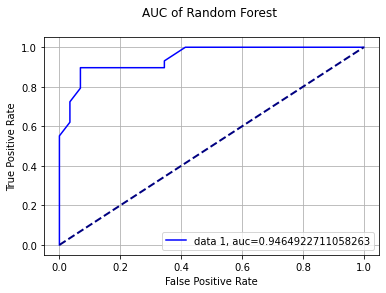

In [98]:
y_pred_proba = rf_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
rf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(rf_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Random Forest \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [99]:
# # get importance
# importance = rf_grid.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Feature ranking:
---------------------
1. oldpeak (0.159169)
2. thal (0.119168)
3. ca (0.108228)
4. thalach (0.105516)
5. chol (0.090500)
6. age (0.087107)
7. cp (0.082686)
8. trestbps (0.081502)
9. slope (0.053638)
10. exang (0.049207)
11. sex (0.037468)
12. fbs (0.012980)
13. restecg (0.012832)


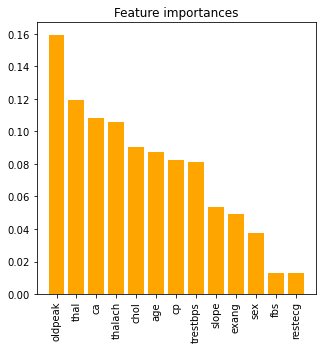

In [100]:
importances = rf_grid.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf_grid.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(x_data.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
# plt.bar(range(x_data.shape[1]), importances[indices],color="orange", yerr=std[indices], align="center")
plt.bar(range(x_data.shape[1]), importances[indices],color="orange", align="center")
plt.xticks(range(x_data.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, x_data.shape[1]])
plt.show()

After calculating the feature importance in Random Forest, we can see that the independent variable ST depression induced by exercise relative to rest (oldpeak) shows the highest score of 0.1591, and is followed by thalassemia (thal) with a score of 0.1192 and number of major vessels (0-4) colored by fluoroscopy (ca) with a score of 0.1082. This indicates that “oldpeak” is the most important or relevant feature towards the output variable, which is heart disease. In other words, the result of a patient getting heart disease strongly depends on the “oldpeak”. 

On the other hand, the resting electrocardiographic measurement (restecg) shows the least score of  0.01283 in this feature importance test and is followed by fasting blood sugar (fbs)  with a score of 0.01298 and sex with a score of 0.03747.

### 4.2.5 Support Vector Machine (SVM)


Support Vector Machine (SVM) is considered a classification approach. It is one of the most popular and commonly used supervised machine learning algorithms. It offers results with higher accuracy as compared to other algorithms. SVM is useful in handling continuous and categorical variables. It uses the technique called kernel trick to transform the data and form an optimal boundary between the possible outputs. The boundary is better known as the hyperplane.  After forming the hyperplane, the classifier will use it to separate the data points with the largest amount of margin. The data points which are closest to the hyperplane are called the support vectors.


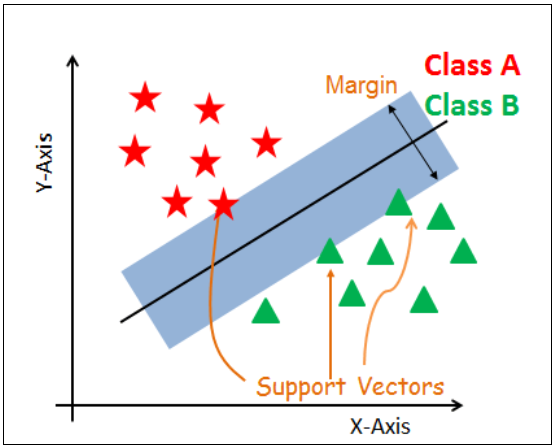


The main objective of SVM is to determine the best hyperlane that produces the largest margin. This is to accurately segregate the given dataset into a few classes. The larger the margin, the better the SVM is. In our case study, the hyperplane should be placed between the group “yes” or “no”. 

SVM algorithm uses mathematical functions to define the kernel. Kernel is used to take the input and fit the transform into the required form. There are a lot of different types of kernel in SVM algorithms such as Radial Basis Function (RBF), linear, sigmoid, and polynomial. The most common kernel function is RBF and it is the default type when using SVM. This is because it is easier to calibrate as compared to the rest and it is a function value that depends on the distance from the origin.  Polynomial kernel is a transformer to generate new features by applying the polynomial combination of all the existing features and it is commonly used in image processing. Besides, it is easier to calculate by multiplying the increasing power of the kernel with the dot. Next, Linear SVM is the simplest kernel function and is used when it has a linearly separable set of data points. Imaging that like a coordinate, it has a set of coordinates which are separable by a straight line. In this case, linear SVM is trying to find a straight line which maximizes the margin to the closest point to it. Lastly, sigmoid is originated from neural network theory. It is equivalent to a two-layer perceptron neural network. There are two adjustable parameters in the sigmoid, which are the alpha and the intercept constant (c). We are using the gridsearchCV to determine which kernel is more suitable to be applied in our assignment. 

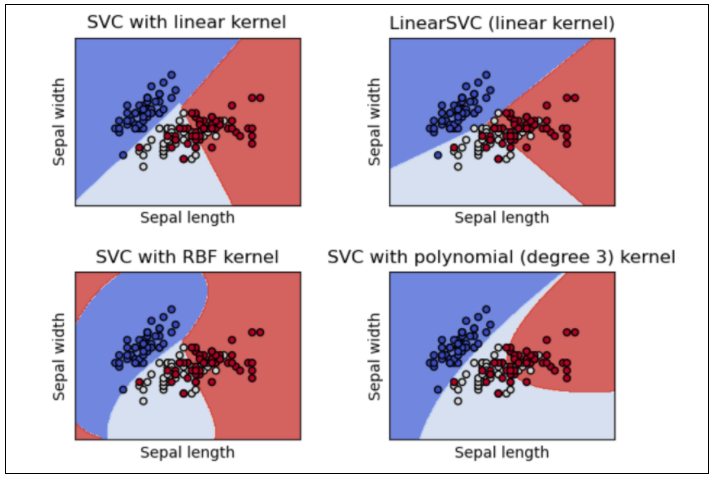
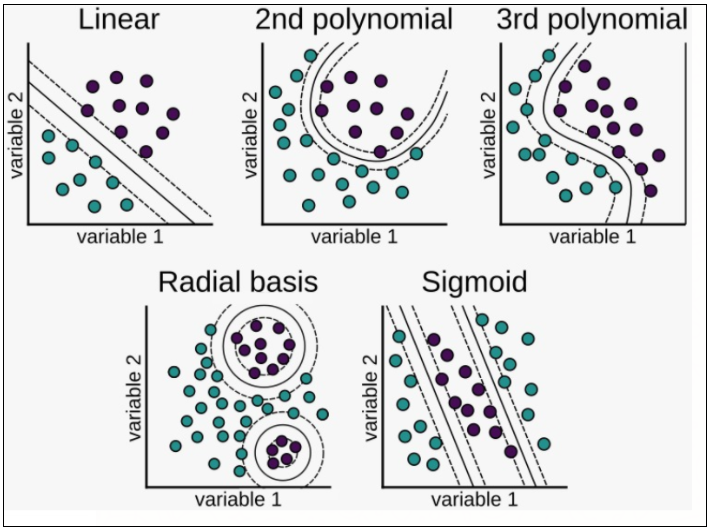

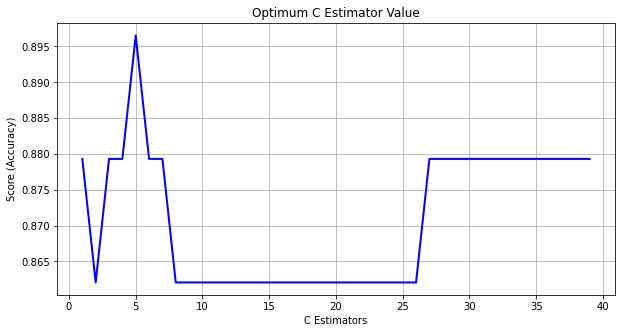

In [101]:
from sklearn.svm import SVC

#Find Optimum C value
scores = []
for i in range(1,40):
    svm = SVC(C = i,random_state=0)
    svm.fit(x_train,y_train)
    scores.append(svm.score(x_test,y_test))

plt.figure(1, figsize=(10, 5))
plt.plot(range(1,40),scores,color="blue",linewidth=2)
plt.title("Optimum C Estimator Value")
plt.xlabel("C Estimators")
plt.ylabel("Score (Accuracy)")
plt.grid(True)
plt.show()

In [102]:
svm = SVC(C=5,probability=True)

parameter_svm = {
  'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
  'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
   'kernel': ['rbf','sigmoid','linear']
}

svm_grid = GridSearchCV(svm,parameter_svm)
svm_grid.fit(x_train, y_train)

svm_acc_test = (svm_grid.score(x_test, y_test)) * 100
svm_acc_train = (svm_grid.score(x_train, y_train)) * 100

print('SVM accuracy for test set: {:.2f}%'.format(svm_acc_test))
print('SVM accuracy for training set: {:.2f}%'.format(svm_acc_train))


SVM accuracy for test set: 87.93%
SVM accuracy for training set: 85.59%


In [103]:
from sklearn import metrics
svm_cm = confusion_matrix(y_test,svm_grid.predict(x_test))
svm_cm

array([[24,  5],
       [ 2, 27]], dtype=int64)

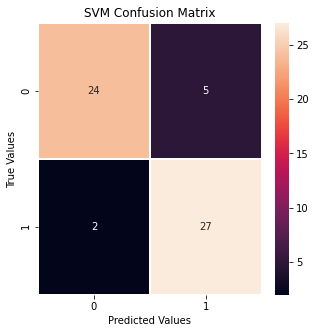

In [104]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(svm_cm,annot=True,linewidths=0.5)

plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [105]:
from sklearn.metrics import classification_report

y_true_svc, y_pred_svc = y_test, svm_grid.predict(x_test)
print(classification_report(y_true_svc, y_pred_svc))

svm_pre = precision_score(y_true_svc, y_pred_svc) * 100 
svm_rec = recall_score(y_true_svc, y_pred_svc) * 100 
svm_f1 = f1_score(y_true_svc, y_pred_svc) * 100 

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.84      0.93      0.89        29

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58



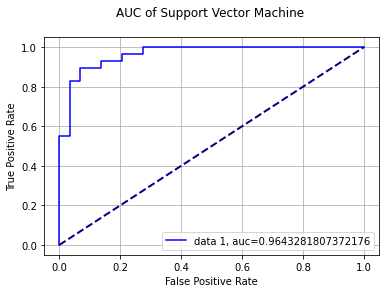

In [106]:
y_pred_proba = svm_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
svm_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(svm_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Support Vector Machine \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

### 4.2.6 Naive Bayesian (NB)

Naive Bayesian is the most straightforward and quick classification algorithm. It has high accuracy and speed on large datasets. This is because the NB classifier will calculate the explicit probabilities for hypotheses. Naive Bayes classifier assumes that the effect of each feature/independent variable is independent of one another. As an example, the target of heart disease depends on the age, sex, maximum heart rate and others. Although they are all interdependent, they are still considered independently. This helps to simplify the computation. This assumption is known as class conditional independence.

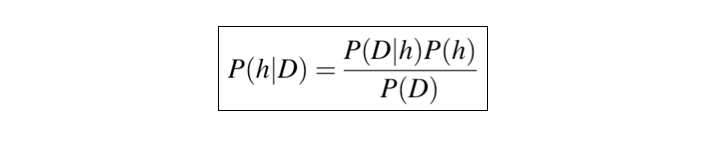

1. P(h): Probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.
2. P(D): Probability of the data (regardless of the hypothesis). This is known as the prior probability.
3. P(h|D): Probability of hypothesis h given the data D. This is known as posterior probability.
4. P(D|h): Probability of data d given that the hypothesis h was true. This is known as posterior probability.

Step:
1. The prior probability for the class label (i.e target) is calculated.
2. The conditional probability for each attribute (x variable) is calculated. 
3. Multiply the same class conditional probability (step 2)
4. Take the prior probability (in step 1) and multiply it with the probability (in step 3)

If the probability of “yes” is higher, it means that the patient is getting heart disease. On the other hand, if the probability of “no” is higher, it means that the patient is not getting heart disease 



In [107]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb = GaussianNB()

params_NB = {
    'var_smoothing': np.logspace(0,-9, num=100) 
}

nb_grid = GridSearchCV(nb,params_NB)

nb_grid.fit(x_train, y_train)

nb_acc_test = (nb_grid.score(x_test, y_test)) * 100
nb_acc_train = (nb_grid.score(x_train, y_train)) * 100


print('NB accuracy for test set: {:.2f}%'.format(nb_acc_test))
print('NB accuracy for traning set: {:.2f}%'.format(nb_acc_train))


NB accuracy for test set: 86.21%
NB accuracy for traning set: 83.84%


In [108]:
from sklearn import metrics
nb_cm = confusion_matrix(y_test,nb_grid.predict(x_test))
nb_cm

array([[22,  7],
       [ 1, 28]], dtype=int64)

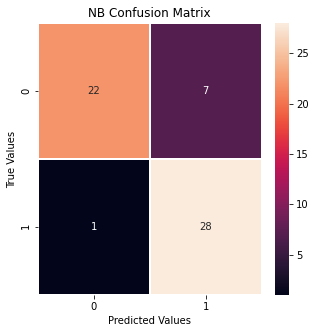

In [109]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(nb_cm,annot=True,linewidths=0.5)

plt.title("NB Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [110]:
from sklearn.metrics import classification_report

y_true_nb, y_pred_nb = y_test, nb_grid.predict(x_test)
print(classification_report(y_true_nb, y_pred_nb))

nb_pre = precision_score(y_true_nb, y_pred_nb) * 100 
nb_rec = recall_score(y_true_nb, y_pred_nb)* 100 
nb_f1 = f1_score(y_true_nb, y_pred_nb)* 100 

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        29
           1       0.80      0.97      0.88        29

    accuracy                           0.86        58
   macro avg       0.88      0.86      0.86        58
weighted avg       0.88      0.86      0.86        58



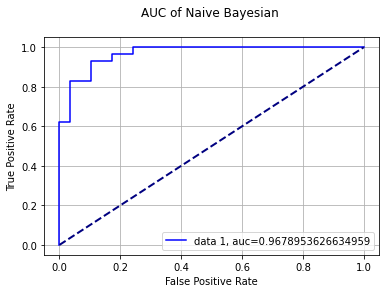

In [111]:
y_pred_proba = nb_grid.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
nb_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(nb_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Naive Bayesian \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

# 5 Evalution  


In [112]:
name = ['KNN','Logistic Regression','Decision Tree','Random Forest','SVM', 'GaussianNB']
acc_test = [(al)for al in [knn_acc_test, lr_acc_test, dt_acc_test, rf_acc_test,svm_acc_test, nb_acc_test]]
pre_all = [(al)for al in [knn_pre, lr_pre, dt_pre, rf_pre,svm_pre, nb_pre]]
rec_all = [(al)for al in [knn_rec, lr_rec, dt_rec, rf_rec,svm_rec, nb_rec]]
f1_all = [(al)for al in [knn_f1, lr_f1, dt_f1, rf_f1,svm_f1, nb_f1]]


## 5.1 Accuracy 

 
Accuracy is measuring all the correctly predicted observations in individual models. It is the most obvious metric to evaluate the model between each other. If the accuracy is high enough, then the model is considered a good model. However, we cannot directly conclude that the algorithm with highest accuracy is the best model among all the algorithms. We can only make conclusions after investigating the precision, recall, F1-score and Area Under Curve (AUC). 

Formula of accuracy is shown as below: 

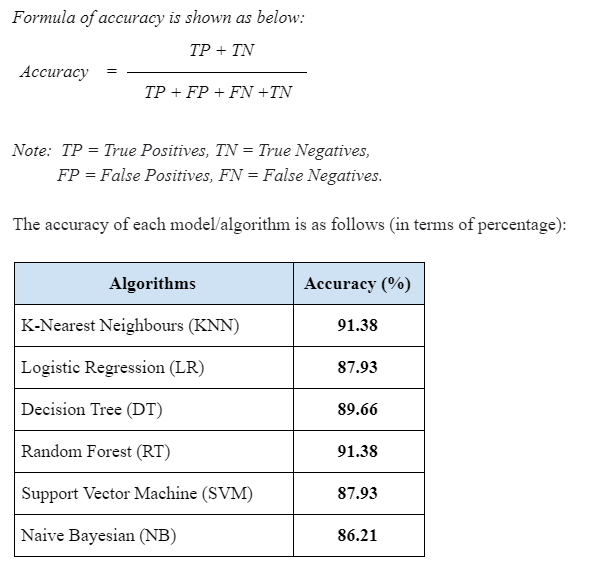




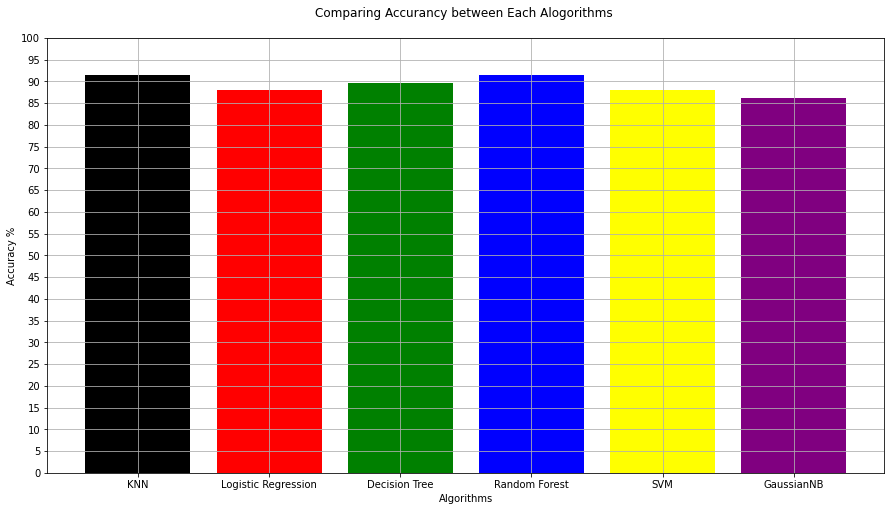

[91.37931034482759, 87.93103448275862, 89.65517241379311, 91.37931034482759, 87.93103448275862, 86.20689655172413]


In [113]:
plt.figure(figsize=(15,8)) 
plt.grid(True)
plt.bar(x=name, height=acc_test,color=['black', 'red', 'green', 'blue', 'yellow','purple'])

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Accurancy between Each Alogorithms \n") 
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()

print(acc_test)

From the table, we can see that the accuracy of all the models used are above 80%. This indicates that all the models are quite accurate. The accuracy of K-Nearest Neighbours (KNN) and Random Forest are the same, which are the highest as compared to other algorithms. Both accuracy are as high as 91.38%. On the other hand, Naive Bayesian (NB) shows the lowest accuracy, which is 82.76%.  

## 5.2 Precision 

Precision refers to how consistent the results are. It is also the degree of measuring prediction to record consistency reading for each algorithm by using the same way. Precision is a valid choice of evaluation metric when we would like to get a reliable and true prediction. High precision relates to the low false positive rate. 

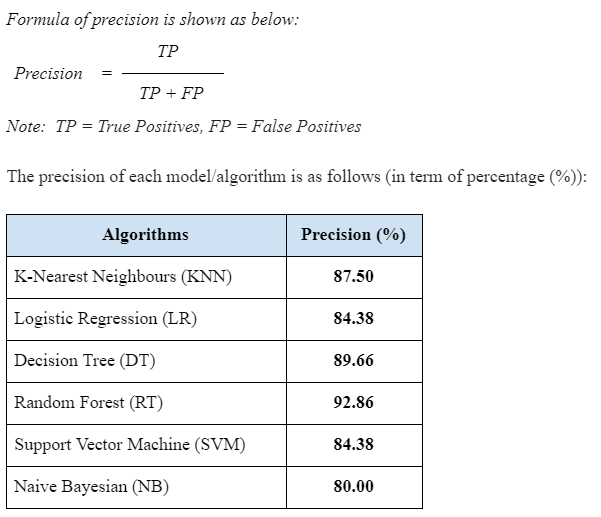

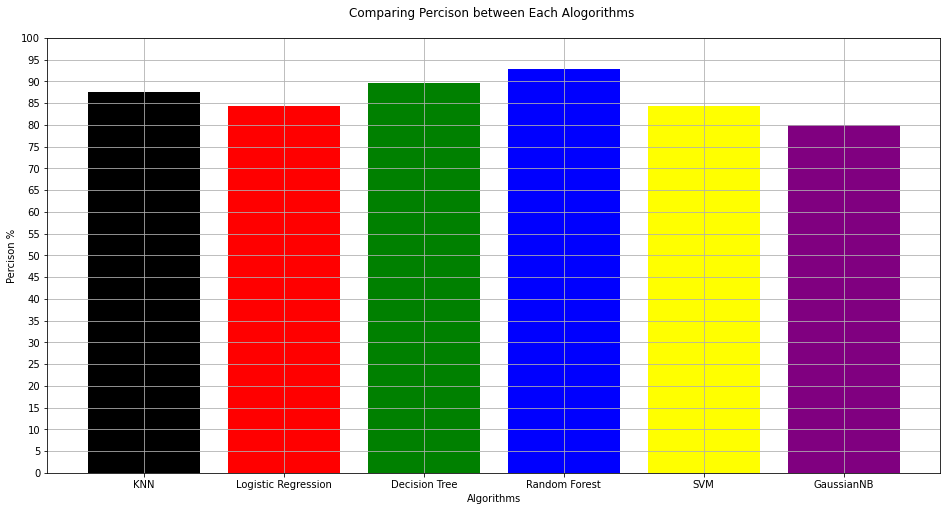

[87.5, 84.375, 89.65517241379311, 92.85714285714286, 84.375, 80.0]


In [114]:
plt.figure(figsize=(16,8)) 
plt.grid(True)
plt.bar(x=name, height=pre_all, color=['black', 'red', 'green', 'blue', 'yellow','purple'])

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Percison between Each Alogorithms \n") 
plt.ylabel("Percison %")
plt.xlabel("Algorithms")
plt.show()

print(pre_all)

From the table, we can see that the precision of all the models used are 80% or above. This indicates that all the models are quite precise and consistent. Random Forest has the highest precision of 92.86%, while Naive Bayesian has the lowest precision of 80.00%. 

## 5.3 Recall

Recall refers to the percentage of total relevant results correctly classified by each algorithm. It is used to tell us how often the predictions capture the positive class. Recall is used to measure false negatives against true positives. False negatives are extremely significant when it comes to biomedical fields like predicting heart disease. The model is said to have low recall when the false negatives increase and the true positives decrease. 


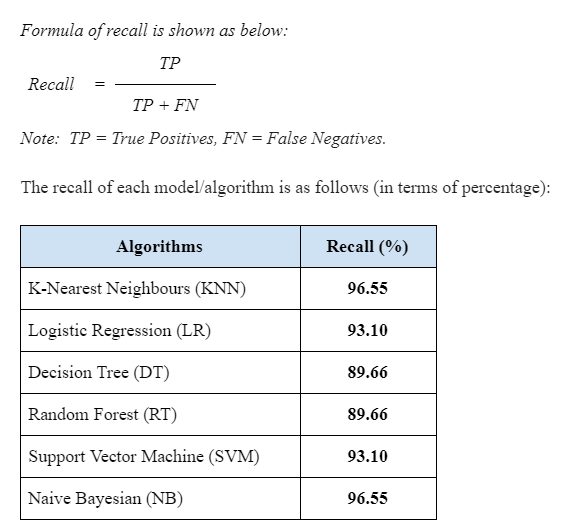

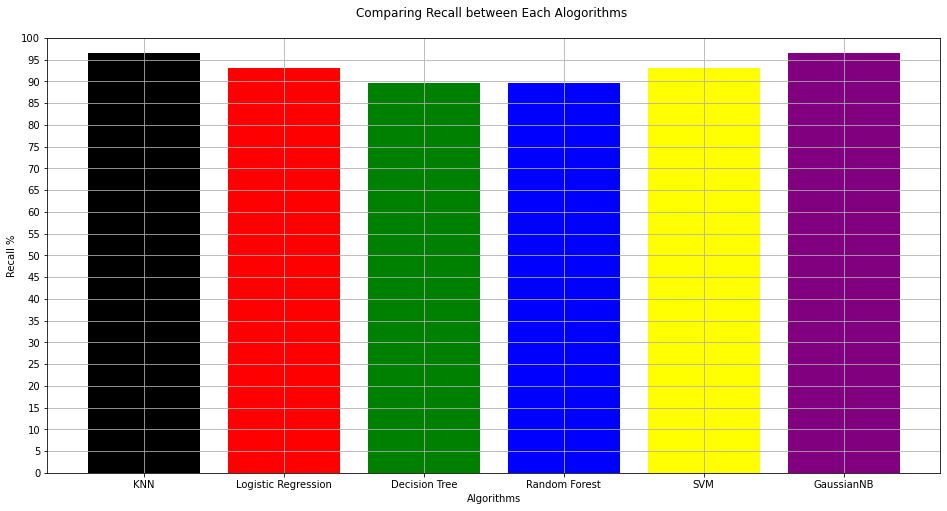

[96.55172413793103, 93.10344827586206, 89.65517241379311, 89.65517241379311, 93.10344827586206, 96.55172413793103]


In [115]:
plt.figure(figsize=(16,8)) 
plt.grid(True)
plt.bar(x=name, height=rec_all, color=['black', 'red', 'green', 'blue', 'yellow','purple'])

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Recall between Each Alogorithms \n") 
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()

print(rec_all)

From the table, we can see that the recall of all the models used are more than 80%. K-Nearest Neighbours (KNN) and Naive Bayes (NB) show the same recall which is 96.55%. They are the models that have the highest recall among all the models. On the other hand, the model that has the lowest recall is Decision Tree (DT) and Random Forest (RT) with 75.86%. The higher the recall, the more the positive class is being captured. 


## 5.4 F1-Score

F1-score is the weighted average of recall and precision. Therefore, F1-score is used when the False Negatives and False Positives are crucial. F1-score is more useful than accuracy when there is any imbalanced data. 

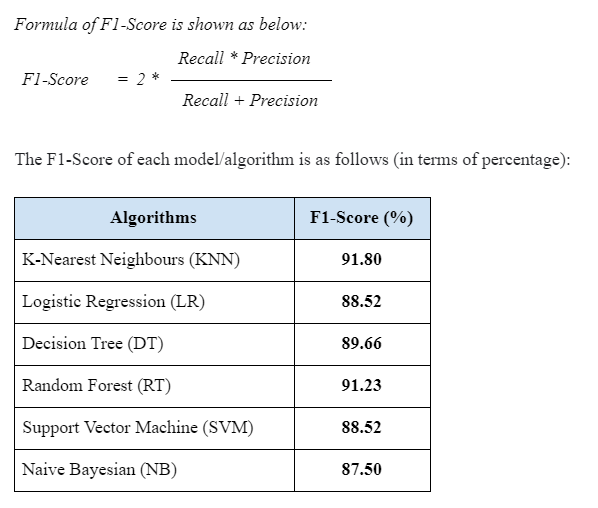

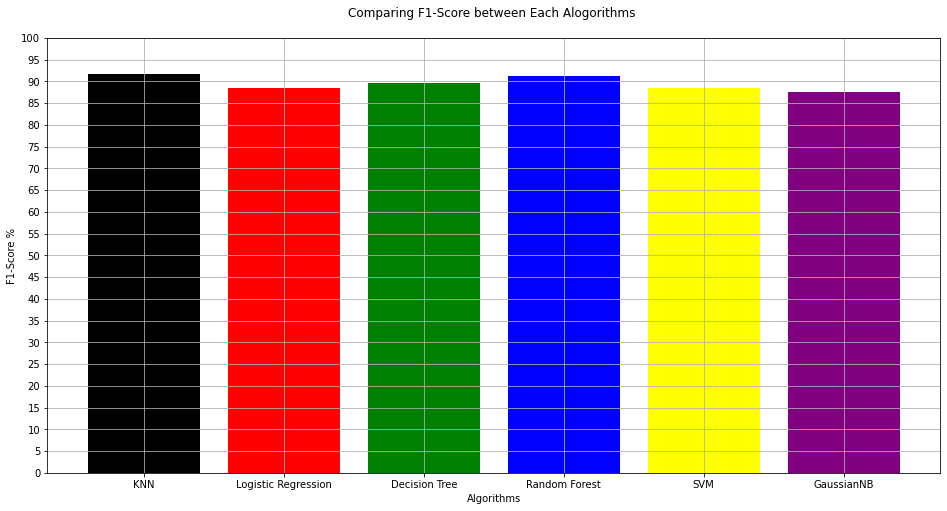

[91.80327868852459, 88.52459016393443, 89.65517241379311, 91.2280701754386, 88.52459016393443, 87.50000000000001]


In [116]:
plt.figure(figsize=(16,8)) 
plt.grid(True)
plt.bar(x=name, height=f1_all,color=['black', 'red', 'green', 'blue', 'yellow','purple'])

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing F1-Score between Each Alogorithms \n") 
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()

print(f1_all)

From the table, we can see that the F1-score of all the models used are more than 80%. The F1-score of K-Nearest Neighbours (KNN) is 91.80%, which is the highest one as compared to other algorithms. While, Decision Tree (DT) has the lowest F1-score of 81.48%. 

## 5.5 Area Under Curve (AUC)

AUC can be interpreted as the total area under the Receiver Operating Characteristic (ROC) curve. AUC measures the trade-off between the true positive rate and the false positive rate and it is measuring the entire two-dimensional area under the entire ROC curve (considering integration) from (0,0) to (1,1). For example, the higher the AUC, the better the model is at distinguishing between patients with or without heart disease.

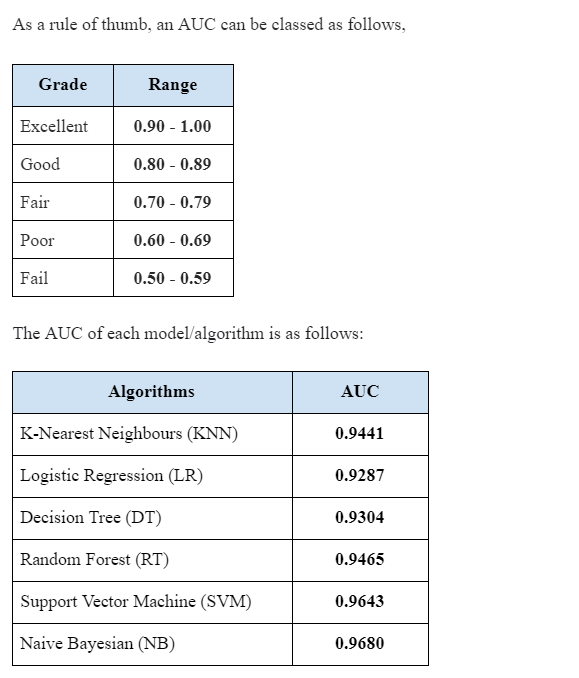

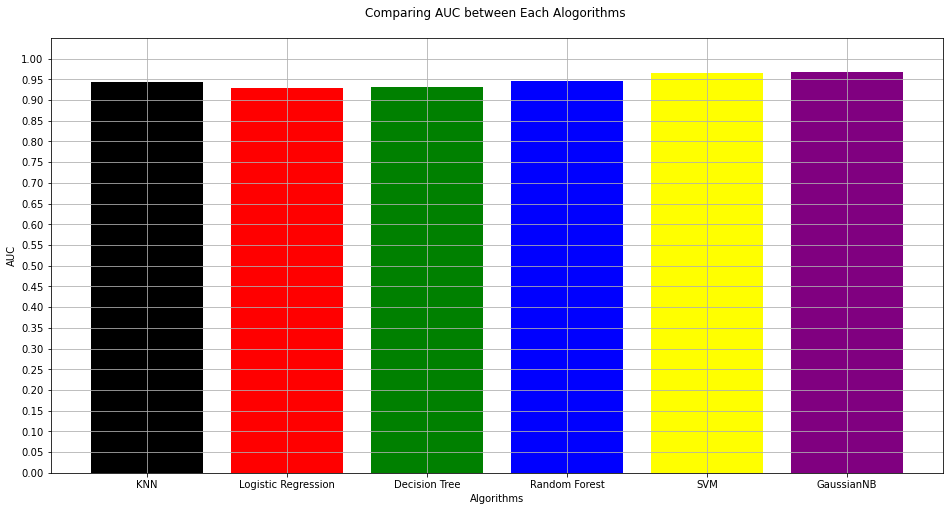

[0.944114149821641, 0.9286563614744352, 0.9304399524375743, 0.9464922711058263, 0.9643281807372176, 0.9678953626634959]


In [117]:
auc_all = [(al)for al in [knn_auc, lr_auc, dt_auc, rf_auc,svm_auc, nb_auc]]

plt.figure(figsize=(16,8)) 
plt.grid(True)
plt.bar(x=name, height=auc_all,color=['black', 'red', 'green', 'blue', 'yellow','purple'])

plt.xticks()
plt.ylim((0,1.05))

plt.yticks(np.arange(0,1.05,0.05))
plt.title("Comparing AUC between Each Alogorithms \n") 
plt.ylabel("AUC")
plt.xlabel("Algorithms")
plt.show()

print(auc_all)

From the table, we can see that the AUC of all the models used are more than 90%. Naive Bayesian (NB) has shown the highest AUC , that is 0.9680 while Logistics Regression (LR) has shown the lowest AUC with 0.9287.


# 6 Deployment 


## 6.1  Selection of Best Model


By making comparison with all the models we tested, K-Nearest Neighbours (KNN) algorithm and Random Forest (RF) algorithm have the best results among all the algorithms in terms of Accuracy, Recall and F1-score.

In the Evaluation part, the K-Nearest Neighbours algorithm and Random Tree Algorithm had  these results:

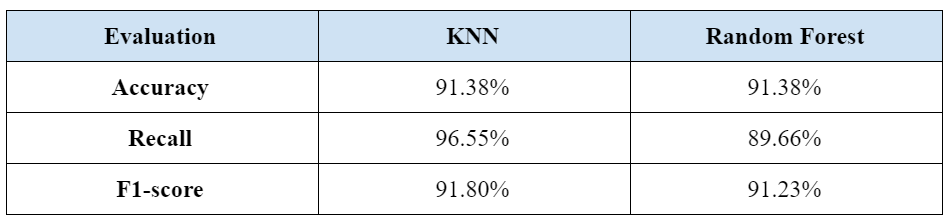

Based on the table above, it shows the summary of the accuracy, recall and F1-score of the KNN and Random Forest. The reason why we do not refer to the precision is because precision is usually used when the dataset contains some imbalance data. Since our dataset does not contain any missing values and the data is quite balanced, therefore we do not focus too much on the precision. Instead the result of accuracy, recall and F1-score tend to be more important. 

First of all, the accuracy for both algorithms are exactly the same, which is 91.38%. KNN is having the highest accuracy when the K-value is equal to 5. This is probably due to the selection of the best K-value. We have identified the range of K-values from the Mean Square Error (MSE). The lowest MSE indicates the best K-value. After running several rounds of testing, we can conclude the best K-value is 5. Hence, with the best K-value, we are able to obtain the highest accuracy. While, Random Forest produces high accuracy and It can handle large numbers of features due to the embedded feature selection in the model generation process which appears to get the results of 91.38% accuracy when we tested with our datasets. Normally, Random Forest will provide highest accuracy compared with other algorithms, this is because it is more powerful and works correctly for the large range of data items than decision trees. The more the trees, the higher the accuracy is.

Besides, Recall is also quite useful and important in making a prediction on whether the patients have heart diseases or not. High recall means low false negative rate. In other words, high recall will return correct results most of the time and it is often paired with a human expert to filter out the false positive. In the biomedical science field, false negative means the system predicts that the patients do not have heart disease but end up the diagnosis is wrong. This is indeed a very serious mistake and must be eliminated as much as it can. Based on our study, we found that the KNN model produces the highest recall value which is as high as 96.55%. The true positive value of KNN is 28 and it only has 1 false negative value. This is the reason why the recall of KNN is the highest as compared to others. Since the accuracy of KNN and Random Forest are the same, then we need to use other methods to evaluate which algorithm is the best model. Whereas, the recall of Random Forest is lower than KNN with the result of 89.66%. This is because the Random Forest has higher false negative value and lower true positive. In short, KNN is having the highest recall as compared to Random Forest. 

Lastly, we calculate the F1-score in order to evaluate both the algorithms. F1-score incorporates both precision and recall into a single metric. It is usually more useful than accuracy. High F1-score indicates that the model has a very good performance. In order to calculate F1-score, we need to take the values of the precision and recall. The model with the highest F1-score is KNN with 91.80%. It is because KNN has a very high accuracy and recall. On the other hand, Random Forest shows the lowest percentage of recall (91.23%), although it has the highest precision value. The difference of F1-score between KNN and Random Forest is quite small which is 0.57%. 

Therefore, after evaluating the accuracy, recall and F1-score of the , we can conclude that KNN is the best algorithm to apply in this study for making the prediction and analysis of heart diseases. 


## 6.2 Application Programming Interface (API)

After selecting the best model, we need to deploy KNN model into API using Flask framework and Docker technique. 

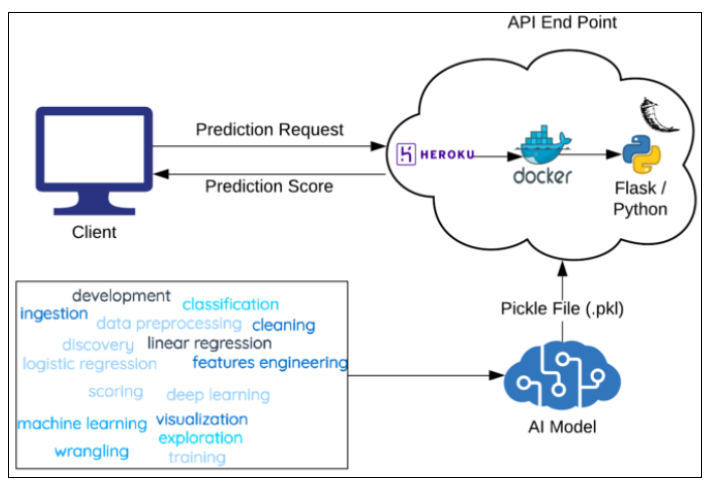

APIs are very much like web applications, but instead of producing a nicely styled HTML page, APIs tend to return data in a standard data-exchange format such as JSON, XML, etc. Once a developer has the desired output they can style it whatever the way they want. Majority of the cloud providers and smaller machine learning focused companies would provide read-to-use APis to cater the needs of developers that do not have much knowledge in Machine Learning but want to implement the model in their production line. 

Flask is a Python-based web framework that can be easily installed using pip. Many tools, libraries and predefined standards come with this framework. Hence, the developers can easily build a web application or APIs. Flask is also considered a micro-framework where it has little or no dependency on external libraries.

While Docker is a containerization technique that is used to deploy software applications to both cloud platforms and on-premise servers. It allows the developers to package their application in a single part along with all the dependencies. Hence, they can simply deploy the application anywhere and anytime without having to worry about the dependencies. As a result, the application can run quickly and reliably from one computing environment to another.

Initially, we need to export the model coefficients (KNN model being the best model in our case study) in the pickle file and it will store the coefficients in the serialised form. Hence, we can just simply import this file in the future without having to train the model every time. Next, we will load the pickle file and call the predict method. This method will store information like importing packages, loading the model into memory, importing the test data and producing the result. With that, the new unseen data will be passed in the form of hardcoded value.

There will be an API endpoint so that we can call the API with the values for age, sex, resting blood pressure and others (independent variables). Then, we will need to build an API server and containerise it in a Docker container. The steps of the deployment are as follows:

1. Create a new folder named “python_docker_heroku”.

2. Create a Python script file and this file will serve all the API requests as well as the prediction code explained previously into a function. This function will be called by API endpoint after the initialisation of Flask app. It will accept the independent variables for prediction as GET parameters. 

3. Create another file which holds all the dependencies required to run the application such as “Flask==0.10.1”, “sklearn==0.0” and “scikit-learn==0.23.1”. 

4. Create a Docker file which helps to build the Docker Image. We will use Ubuntu as the base image and install Python3 in it.

5. Build the Docker image locally and then run the Flask application to check whether everything is working properly on the local machine before deploying it to Heroku.

6. Lastly, deploy it on Heroku if the Python application is functional.

The reason for choosing Heroku as the deployment platform is because Heroku is a cloud service provider and software development platform which helps in fast and effective building, deploying and scaling of web applications. It enhances the productivity of the cloud application development team and allows the development, QA and business stakeholders to create a unified dashboard. Besides, in terms of security, Heroku will take on the responsibility of making sure that the server is always up-to-date and can operate at all time. Lastly, Heroku is very flexible where it allows us to build apps using the preferred language framework, and using popular architectural patterns. Therefore, we do not need to just stick on the fixed type of language when deploying the model.


# 7 Conclusion 
Pros and Cons of Alogrithms Used

## 7.1 K-Nearest Neighbours (KNN)

### **Pros** 
#### 1. No training period 
- KNN is also known as the Lazy Learner algorithm because it doesn’t need to learn anything during training, nor to derive any discriminant function from the training data. In other words, KNN doesn’t have a training period. It stores the training dataset and only uses it for learning when making real-time predictions. Eventually, the KNN algorithm is much faster than other algorithms that need training such as SVM, Linear Regression and others.

#### 2. Easy to implement 
- KNN is very easy to conduct because it only needs two parameters to conduct which is the value of K and the distance function such as Euclidean and Manhattan

### **Cons** 
#### 1. Require Feature Scaling 
- We are required to conduct feature scaling such as normalization and standardization before applying this KNN to any dataset especially involving continuous and qualitative data like male and female in the sex column. It probably will produce incorrect predictions if we did not apply it before training and testing.

#### 2. Sensitive to noisy data, missing values, and outliers  
- KNN is sensitive to noise in the dataset. Therefore, we are required to manually remove the outliers and missing values or we can replace the missing values with mean values. By doing this, we only can gain a better result for the KNN model.






## 7.2 Logistic Regression (LR)

### **Pros** 
#### 1. Less tempted to over-fitting

- Overfitting is unlikely to happen if we are using the LR algorithm for prediction but it also may happen when we are having high dimensional datasets. So, we actually can apply the Regularization (L1 and L2) techniques when building the LR model to prevent overfitting from happening.

#### 2. Good accuracy
- LR model normally can achieve good accuracy and perform very well for many simple data sets and also when the dataset is linearly separable.

### **Cons** 
#### 1. Cannot deal with non-linear dataset
- The main disadvantage of LR is the assumption of linearity between the independent variables and the dependent variables but unluckily it is rare to find linearly separable data in the real world. The data will be messed up easily most of the time if dealing with non-linear data.

#### 2. Predict discrete functions only
- Logistic Regression can only be used to predict discrete functions. Thus, the dependent variable of logistic regression is limited to the discrete number set. This limitation itself is problematic because it limits the prediction of continuous data.

## 7.3 Decision Tree (DT)

### **Pros** 
#### 1. Easy to use, learn and understand
- Decision trees are easy to use and can be explained by simple mathematics without the need of complex formulas. They visually present all the decision alternatives in an intuitive and more understandable way for quick comparisons with only brief explanations. They are intuitive and follow the same pattern of thinking that humans use when making decisions.

#### 2. Comprehensive
- The significant advantage of a DT is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It developed a comprehensive analysis of the consequences of each branch and determines which decision nodes require further analysis.

#### 3. Effortless in data preprocessing stage
- DT does not need normalization and standardization of data and also doesn’t need to remove or replace the missing values as missing values doesn’t affect the process of building decision trees to any considerable extent.

### **Cons** 
#### 1. Tends to overfit
- DT tends to overfit when the nodes of the tree are expanding to extremely deep. This is due to the amount of specificity we are observing is leading to smaller samples of events that fulfil the previous assumptions. Every small change in data will greatly affect the prediction. So, the small sample may lead to unsound conclusions.

#### 2. High Variance
- Small variations or changes in data may result in completely different trees for the DT model.

#### 3. Result is not optimum
- Building DT models need algorithms that can determine an optimal choice at each node. So, DT algorithm is a greedy model as it will always choose the best decision or result at each step, but not taking the global optimum into account. Consequently, choosing the best result at each node will not guarantee to lead you to the optimal decision when you reach the last node of the tree, called the leaf node.

## 7.4 Random Forest (RF)

### **Pros** 
#### 1. Reduce overfitting
- Random forest is based on the bagging algorithm and uses integrated learning technology. It creates as many trees as possible on the data subset and merges the output of all trees. In this way, it can reduce the problem of overfitting in decision trees, and also reduces the variance, thereby improving the accuracy.

#### 2. Require no feature scaling
- RT does not need normalization and standardization of data and also doesn’t need to remove or replace the missing values as RT can automatically handle missing values. Besides, RT is also usually robust to outliers and can handle them automatically. Lastly, RT works well with both categorical and continuous data.

### **Cons** 
#### 1. Complexity
- RF creates many trees (unlike only one tree only in decision tree) and merdes their outputs. By default, it creates 100 trees in the Python sklearn library. For this reason, the algorithm needs more computing power and resources. In other words, the decision tree is very simple and doesn’t need much computing resources.

#### 2. Longer Training Period
- RF will need to take longer time during the training period compared to the decision trees algorithm. This is because RF needs to generate many trees (instead of one tree only like decision trees) and makes decisions on most votes.

## 7.5 Support Vector Machine (SVM)

### **Pros** 
#### 1. Solves both Classification and Regression problems 
- SVM can be used to solve classification and regression problems. SVM is used for classification problems, while SVR (support vector regression) is used for regression problems.

#### 2. Stability
- Small changes in the data will not have much impact on the hyperplane, and therefore will not have a great impact on SVM models. This is due to SVM uses the concept of ‘Support Vectors‘, which are the closest points to the hyperplane. If the closest points are not affected, then the SVM model is not affected. Thus, the SVM model is stable.

### **Cons** 
#### 1. Risks of overfit
- When the number of features in the data set is much larger than the number of samples and the adjustment of the regularization parameters, C is not carefully adjusted, SVM tends to overfit.

#### 2. Poor in handling large datasets
- SVM is not feasible for large datasets. This is because storing the kernel matrix requires memory that scales quadratically with the number of data points and the training time for traditional SVM algorithms also scales superlinearly with the number of data points.

## 7.6 Naive Bayes (NB)

### **Pros** 
#### 1. Better performance
- When assumption of independent predictors holds true, a Naive Bayes classifier performs better as compared to other models.

#### 2. Small amount of data needed
- Naive Bayes requires a small amount of training data to estimate the test data. So, the training period is less.

### **Cons** 
#### 1. Assumption of independent predictors
- Main imitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it is almost impossible that we get a set of predictors which are completely independent.

#### 2. Need to handle Zero Frequency
- If categorical variable has a category in the test dataset, which was not observed in the training data set, then the model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation


# 9 Reference

1. Smart Vision Europe. 2020. Crisp DM Methodology - Smart Vision Europe. [online] Available at: <https://www.sv-europe.com/crisp-dm-methodology/#one> [Accessed 31 August 2020].

2. Scikit-learn.org. 2020. 3.5. Validation Curves: Plotting Scores To Evaluate Models — Scikit-Learn 0.23.2 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/learning_curve.html> [Accessed 31 August 2020].

3. DataCamp Community. 2020. KNN Classification Using Scikit-Learn. [online] Available at: <https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn> [Accessed 31 August 2020].

4. DataCamp Community. 2020. Naive Bayes Classification Using Scikit-Learn. [online] Available at: <https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn> [Accessed 31 August 2020].

5. DataCamp Community. 2020. Decision Tree Classification In Python. [online] Available at: <https://www.datacamp.com/community/tutorials/decision-tree-classification-python> [Accessed 31 August 2020].

6. DataCamp Community. 2020. Random Forests Classifiers In Python. [online] Available at: <https://www.datacamp.com/community/tutorials/random-forests-classifier-python> [Accessed 31 August 2020].

7. Scikit-learn.org. 2020. Sklearn.Linear_Model.Logisticregression — Scikit-Learn 0.23.2 Documentation. [online] Available at: 
<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html> [Accessed 31 August 2020].

8. DataCamp Community. 2020. (Tutorial) Support Vector Machines (SVM) In Scikit-Learn. [online] Available at: 
<https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9066714&gclid=EAIaIQobChMIobXH1p7E6wIVg9eWCh2AoQ5rEAAYASAAEgKzR_D_BwE> [Accessed 31 August 2020].

9. Scikit-learn.org. 2020. Sklearn.Svm.SVC — Scikit-Learn 0.23.2 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html> [Accessed 31 August 2020].

10. Wikipedia Contributors (2019). k-nearest neighbors algorithm. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm.

11. www.saedsayad.com. (n.d.). KNN Regression. [online] Available at: https://www.saedsayad.com/k_nearest_neighbors_reg.htm [Accessed 31 Aug. 2020].

12.  Statistics Solutions. (2013). What is Logistic Regression? - Statistics Solutions. [online] Available at: https://www.statisticssolutions.com/what-is-logistic-regression/.

13. Readthedocs.io. (2017). Logistic Regression — ML Glossary  documentation. [online] Available at: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html.

14. Wikipedia Contributors (2019). Decision tree learning. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Decision_tree_learning.

15. Chauhan, N.S. (2020). Decision Tree Algorithm — Explained. [online] Medium. Available at: https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4#:~:text=Decision%20Tree%20algorithm%20belongs%20to%20the%20family%20of%20supervised%20learning%20algorithms.&text=The%20goal%20of%20using%20a [Accessed 1 Sep. 2020].

16. Chirag Sehra (2018). Decision Trees Explained Easily. [online] Medium. Available at: https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248.

17. Built In. (2019). A complete guide to the random forest algorithm. [online] Available at: https://builtin.com/data-science/random-forest-algorithm.

18. Wikipedia Contributors (2019). Random forest. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Random_forest.
‌dummies. 2020. Phase 3 Of The CRISP-DM Process Model: Data Preparation - Dummies. [online] Available at: <https://www.dummies.com/programming/big-data/phase-3-of-the-crisp-dm-process-model-data-preparation/> [Accessed 3 September 2020].

19. Atrium. 2020. Build And Deploy A Docker Containerized Python Machine Learning Model On Heroku - Atrium. [online] Available at: <https://atrium.ai/resources/build-and-deploy-a-docker-containerized-python-machine-learning-model-on-heroku/> [Accessed 12 September 2020].

20. DataCamp Community. 2020. Turning Machine Learning Models Into Apis. [online] Available at: <https://www.datacamp.com/community/tutorials/machine-learning-models-api-python> [Accessed 12 September 2020].

